# Great British Bake Off 👩‍🍳🍰🇬🇧

## Outline of the Project 


-  [About the Show 📺](#about_show)
-  [About the Data 💾](#about_data)
-  Section 1. [Exploratory Data Analysis 🔎](#section1)  
-  Section 2. [Popular Ingredients 🍊 🍫](#section2) 
-  Section 3. [Gender Balance 👩⚖️🧑🏼](#section3)  
-  Section 4. [Well-Deserved? 🥇](#section4)  
-  Section 5. [Devilishly Difficult Challenges 😈](#section5)  
-  Section 6. [Piece of Cake? 🍰](#section6) 
-  Section 7. [Recipe Name Generator 👩‍🍳🖨️](#section7) 
-  Section 8. [Dishwashing 🧼🍽️](#section8) 

In [1]:
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

<a id='about_show'></a>
## About the Show 📺

The Great British Bake Off (known in the US as the Great British Baking Show) is a competition-style television show where amateur bakers participate in themed baking challenges. Each week's episode revolves around a theme; past themes include Bread Week, Cake Week, Vegan Week, and Italian Week. In each episode, the bakers are given three timed challenges based on the week's theme: the Signature Challenge, the Technical Challenge, and the Showstopper Challenge. 

In the Signature Challenge, the judges broadly specify what the bakers should make, and the bakers have freedom to use flavors, techniques, and recipes as they wish. The Signature Challenge earns its name because it's an opportunity for bakers to express themselves and their unique baking style to both the judges and the viewers at home. Many of the Signature Challenge bakes come from tried-and-tested recipes that contestants like to bake for their friends and families. For example, during Festivals Week in Season 10, the bakers were tasked with creating 24 buns themed around a world festival or holiday. Contestant Henry Bird made [these Chocolate Kardemummabullar](https://thegreatbritishbakeoff.co.uk/recipes/all/henry-chocolate-kardemummabullar/).

In the Technical Challenge, bakers have no idea what they will be asked to create until the timer for the challenge starts. This means they can't prepare for it, and they have to rely on their baking knowledge and intuition. The Technical Challenge earns its name because it tests the bakers' technical knowledge of baking as a discipline.  Each Technical Challenge is posed by one particular judge, and uses a recipe from the judge's own personal collection. Bakers are provided with ingredients and a recipe, which is usually extremely basic, sometimes lacking ingredient measurements or containing single steps like "make a shortcrust pastry." The finished products are judged blind and ranked from worst to best. An example of a Technical Challenge includes [judge Paul Hollywood's Baklava](https://thegreatbritishbakeoff.co.uk/recipes/all/paul-hollywood-baklava/). 

The third challenge, the Showstopper, is similar to the Signature Challenge, in that bakers are given requirements ahead of time and have freedom to create their own recipes and prepare ahead of time. The main difference is that the Showstoppers are more challenging and larger-scale. The judges are looking for bakes that are breathtaking in both their appearance and their taste. For example, during Bread Week in Season 6, the bakers were asked to create a 3-D bread sculpture. Contestant Paul Jagger impressed the judges and millions of viewers with his *King of the Jungle* lion sculpture.

Each episode of the show features all three challenges. The contestants' bakes are tasted and assessed by two judges, and at the end of each episode, the hosts announce who will be eliminated from the competition and who will be recognized with a special award of "Star Baker" ⭐ (introduced in Season 2). Typically, one contestant is eliminated and one is crowned Star Baker ⭐, but on occasion there have been special cases in which zero or multiple people were eliminated or awarded Star Baker ⭐. 

The final episode of each season is held when there are just three bakers remaining. All three bakers compete in the final, and at the end, one winner is chosen and each of the others is considered a "runner-up". 

<a id='about_data'></a>
## About the Data 💾
- `baker_weeks`, 
- `challenge_results`,  
- `technical_challenge_recipes`, and
- `bakers`.

Note that while the Great British Bake Off has filmed thirteen seasons, our datasets do not include the most recent seasons. Since our datasets come from different [sources](#sources), some of these datasets include more seasons than others. In addition, the number of bakers each season has varied, but all seasons have filmed one episode per week.
 
The `baker_weeks` DataFrame includes a breakdown of each baker's performance each week (that is, each episode), for the first eleven seasons of the show. Each row represents information **for one baker for one week**. This means that each baker will appear in the DataFrame multiple times. Bakers will continue to appear in the DataFrame even in weeks after they got eliminated, so these rows will have missing values (`NaN`).  
  
The `'Week Name'` column contains the theme of that week's episode. We also have the baker's name, gender ("M" or "F" are the only options), and age, the season number (also called the series number in other DataFrames), and the week number within that season. There are columns that indicate whether each baker was a Star Baker ⭐ that week, was eliminated that week, competed that week, or went on to win the season's competition. A few columns require more explanation about the show:
- `'Judge'` is either "Mary" or "Prue". For the first seven seasons, the show's two judges were [Paul Hollywood](https://en.wikipedia.org/wiki/Paul_Hollywood) and [Mary Berry](https://en.wikipedia.org/wiki/Mary_Berry). After that, the show switched networks and Mary Berry was replaced by [Prue Leith](https://en.wikipedia.org/wiki/Prue_Leith). Since Paul Hollywood was a judge every season, the `'Judge'` column contains the name of the other judge.
- `'technical_rank'` contains a number reflecting each baker's ranking in the Technical Challenge (with 1 meaning 1st place, 2 meaning 2nd place, etc.)
-  `'Signature Handshake'` and `'Showstopper Handshake'` contain information on whether the contestant received a handshake 	🤝 from judge Paul Hollywood as he tasted their bake. Paul has a reputation for giving praise sparingly, and his so-called "[Hollywood Handshakes 	🤝](https://hollywoodhandshakes.com/)" are considered a great honor. 

In [2]:
baker_weeks = bpd.read_csv('data/baker_weeks.csv')
baker_weeks

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,"Series 11, Episode 10",11,10,Prue,Final,Marc E,M,51,0,NaN,0,0,0,0,0
1252,"Series 11, Episode 10",11,10,Prue,Final,Mark L,M,32,0,NaN,0,0,0,0,0
1253,"Series 11, Episode 10",11,10,Prue,Final,Peter,M,20,0,2.0,0,1,0,1,1
1254,"Series 11, Episode 10",11,10,Prue,Final,Rowan,M,55,0,NaN,0,0,0,0,0


The `challenge_results` DataFrame contains information on each challenge, with each row representing one baker in one specific episode. As in `baker_weeks`, bakers will reappear multiple times, even after they get eliminated, hence the abundance of `NaN` values. This dataset contains information for the first ten seasons of the show.

The `'result'` column indicates whether a baker was eliminated or stayed in the competition. Values of "OUT" and "Runner-up" mean the baker was eliminated, and values of "IN", "STAR BAKER", and "WINNER" mean that the baker stayed in the competition. There is one instance of "WD" in this column for someone who withdrew from the competition, and one instance of "A" for someone who was absent one week. We'll ignore both of these.

The `'technical'` column contains the baker's rank in the Technical Challenge, and the `'signature'` and `'showstopper'` columns contain the names of the recipes the baker prepared for these challenges.  


In [3]:
challenge_results = bpd.read_csv('data/challenge_results.csv')
challenge_results

,series,episode,baker,result,signature,technical,showstopper
0,1,1,Annetha,IN,Light Jamaican Black Cake with Strawberries an...,2.0,"Red, White & Blue Chocolate Cake with Cigarell..."
1,1,1,David,IN,Chocolate Orange Cake,3.0,Black Forest Floor Gateaux with Moulded Chocol...
2,1,1,Edd,IN,Caramel Cinnamon and Banana Cake,1.0,NaN
3,1,1,Jasminder,IN,Fresh Mango and Passion Fruit Hummingbird Cake,NaN,NaN
4,1,1,Jonathan,IN,Carrot Cake with Lime and Cream Cheese Icing,9.0,Three Tiered White and Dark Chocolate with Alm...
...,...,...,...,...,...,...,...
1131,10,10,Michael,NaN,NaN,NaN,NaN
1132,10,10,Michelle,NaN,NaN,NaN,NaN
1133,10,10,Phil,NaN,NaN,NaN,NaN
1134,10,10,Priya,NaN,NaN,NaN,NaN


The `technical_challenge_recipes` DataFrame contains information about each recipe that was given as a Technical Challenge in the first nine seasons. The columns specify the season (`'Ssn'`) and episode (`'Ep'`) that each recipe was baked in, which judge's recipe collection it came from (`'Whose'`), and several aspects of the recipe's complexity:
- number of components (`'Components'`), which are recipes used within the main recipe, such as a frosting or filling,
- number of ingredients (`'IngredCount'`),
- number of sentences in the instructions (`'RecipeSentences'`),
- number of dirty dishes produced (`'Dishes'`), and
- difficulty (`'DifficultyScore'`). 


In [4]:
technical_challenge_recipes = bpd.read_csv('data/technical_challenge_recipes.csv')
technical_challenge_recipes

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
1,1,2,Scone,Paul,https://thegreatbritishbakeoff.co.uk/scones/,1,5,15,6,1.8
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
4,1,5,Cornish pasties,Paul,https://www.bbc.com/food/recipes/classic_corni...,2,11,32,4,3.4
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


The `bakers` DataFrame contains a row for each baker from the first ten seasons, with detailed information about their results in the show, particularly about their performance in the Technical Challenge:
- `'technical_winner'`: number of times they won,
- `'technical_top3'`: number of times they placed in the top three,
- `'technical_bottom'`: number of times they placed last,
- `'technical_highest'`: highest (best) rank they ever earned,
- `'technical_lowest'`: lowest (worst) rank they ever earned, and
- `'technical_median'`: median of all ranks they ever earned.

It also includes information about when they appeared on the show and their demographics such as `'occupation'` and `'hometown'`.


In [5]:
bakers = bpd.read_csv('data/bakers.csv')
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,last_date_us,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,NaN,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,NaN,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,NaN,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,NaN,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,NaN,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,NaN,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,NaN,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,NaN,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,NaN,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F


Our data comes from a variety of different [sources](#sources) and may contain errors. If you find any errors in the data, do not attempt to fix them; just analyze the data you are given. 

<a id='section1'></a>
## Section 1: Exploratory Data Analysis 🔎

A common sentiment among long-time viewers of the show is that the baking challenges are getting harder over time. Does the data support this? 

**Question 1.1.** Using the `technical_challenge_recipes` DataFrame, create an overlaid line plot that shows the season number on the horizontal axis and on the vertical axis:
- average number of dirty dishes produced by recipes in that season, 
- average number of components in recipes in that season,
- average number of ingredients in recipes in that season, and 
- average difficulty score of recipes in that season.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_1
points: 1
manual: true
-->

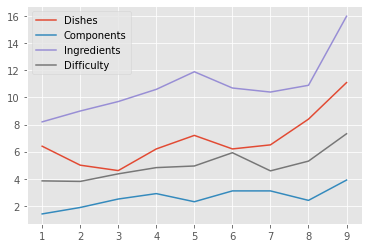

In [6]:
# Create your overlaid line plot here.
means = technical_challenge_recipes.groupby('Ssn').mean().reset_index()
plt.plot(means.get('Ssn'), means.get('Dishes'), label = 'Dishes')
plt.plot(means.get('Ssn'), means.get('Components'), label = 'Components')
plt.plot(means.get('Ssn'), means.get('IngredCount'), label = 'Ingredients')
plt.plot(means.get('Ssn'), means.get('DifficultyScore'), label = 'Difficulty')
plt.legend()

<!-- END QUESTION -->



Some of the recipes the contestants bake are quite complicated. Let's look at some especially long recipe titles.

**Question 1.2.** Using the `challenge_results` DataFrame, which Signature Challenge recipe had the longest name? Save the result as `longest_signature`. 

Similarly, which Showstopper Challenge recipe had the longest name? Save the result as `longest_showstopper`. In both cases, longest means having the most individual characters, including punctuation and whitespace.

In [7]:
sig = challenge_results.assign(len =challenge_results.get('signature').str.len()).sort_values(by='len',ascending=False)
show = challenge_results.assign(len =challenge_results.get('showstopper').str.len()).sort_values(by='len',ascending=False)

In [8]:
longest_signature = sig.get('signature').iloc[0]
print("Longest signature name: ", longest_signature, "\n")

longest_showstopper = show.get('showstopper').iloc[0]
print("Longest showstopper name: ", longest_showstopper, "\n")

Longest signature name:  Beetroot Jelly on Poppy Seed Biscuits Spinach, Parmesan and Egg Tartlets Choux Buns with Goat's Cheese and Caramelised Onions 

Longest showstopper name:  Chocolate Pastry filled with Orange Cheesecake Chocolate Pastry filled with Milk Chocolate Ganache Strawberry Tart with Red Currant Glaze Cheesy Crab, Broad Bean and Tomato, Pancetta Risotto Canapés 



In [9]:
grader.check("q1_2")

q1_2 results: All test cases passed!

Notice that each of these recipes actually involves multiple items. Often the bakers have to make displays of baked goods with multiple components as part of a single challenge.

Another common sentiment among viewers is that the show favors younger people 👧🏽. To further explore the bakers' ages, let's convert the `'age'` column to a categorical variable:

**Question 1.3.** Add an additional column called `'age_category'` to the `bakers` DataFrame, based on the following age categorization:

| Age            | Category    |
| -------------- | ----------- |
| (0, 39]        | Young       |
| (39, 59]       | Middle-Aged |
| (59, $\infty$] | Elderly     |

In [10]:
age=np.array([])
for i in np.arange(120):
    if bakers.get('age').iloc[i]<=39:
        age=np.append(age,'Young')
    elif bakers.get('age').iloc[i]<=59:
        age=np.append(age, 'Middle-Aged')
    elif bakers.get('age').iloc[i]>59:
        age=np.append(age, 'Elderly')

In [11]:
bakers = bakers.assign(age_category=age)
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F,Young
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M,Young
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M,Young
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F,Middle-Aged
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F,Young
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M,Middle-Aged
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F,Young
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F,Young


In [12]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Using the information in the new `'age_category'` column, set `age_prop` to a Series indexed by `'age_category'`, where the values are the proportions of bakers in each `'age_category'`.

In [13]:
age_prop = bakers.groupby('age_category').count().get('series')/120
age_prop

age_category
Elderly        0.100000
Middle-Aged    0.258333
Young          0.641667
Name: series, dtype: float64

In [14]:
grader.check("q1_4")

q1_4 results: All test cases passed!

You should see that a majority of the participants are young!

Next, we'll investigate baker occupations. Do bakers on the show tend to hold certain types of jobs? Maybe they work in the food industry, do a lot of cooking at home, or have creative jobs like an artist 🎨 or photographer 📷. Some baking challenges even require significant feats of construction 🏗️, so maybe architects or engineers are popular.

**Question 1.5.** Using the `bakers` DataFrame, create an array of occupations held by more than one contestant on the show. Save the array in a variable called `popular_jobs`.

In [15]:
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F,Young
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M,Young
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M,Young
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F,Middle-Aged
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F,Young
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M,Middle-Aged
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F,Young
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F,Young


In [16]:
popular_jobs = np.array(bakers.groupby('occupation').count()[bakers.groupby('occupation').count().get('series')>1].reset_index().get('occupation'))
popular_jobs 

array(['Banker', 'Full-time parent', 'Graphic Designer', 'Housewife',
       'Midwife', 'Nurse', 'PE teacher', 'Photographer', 'Retired',
       'Shop assistant', 'Student'], dtype=object)

In [17]:
grader.check("q1_5")

q1_5 results: All test cases passed!

<a id='section2'></a>
## Section 2: Popular Ingredients 🍊 🍫


Now, we'll try to answer some questions about popular ingredients used in bakers' recipes, and whether there's any connection between certain ingredients and a baker's success in the competition. Our data doesn't exactly include ingredient lists, but we do have recipe titles for the Signature and Showstopper Challenges in `challenge_results`, so we can look for common words there. We'll focus specifically on the Signature Challenge, as it's one in which bakers are able to be creative and showcase a recipe unique to them, and so they have complete freedom to use whatever ingredients they want. 


The DataFrame below contains all the rows of `challenge_results` with an entry in the `'signature'` column. We've also dropped the columns relating to the Technical and Showstopper Challenges, since we'll be focusing on the Signature Challenge here.

In [18]:
signatures = bpd.read_csv('data/signatures.csv')
signatures

,series,episode,baker,result,signature
0,1,1,Annetha,IN,Light Jamaican Black Cake with Strawberries an...
1,1,1,David,IN,Chocolate Orange Cake
2,1,1,Edd,IN,Caramel Cinnamon and Banana Cake
3,1,1,Jasminder,IN,Fresh Mango and Passion Fruit Hummingbird Cake
4,1,1,Jonathan,IN,Carrot Cake with Lime and Cream Cheese Icing
...,...,...,...,...,...
698,10,9,Rosie,OUT,"Lemon, Raspberry & Mint Domed Tarts"
699,10,9,Alice,STAR BAKER,"Mocha, Hazelnut & Orange Domed Tarts"
700,10,10,Alice,Runner-up,"Chocolate, Pear, Ginger and Maple Cake"
701,10,10,Steph,Runner-up,Black Forest Chocolate Cake


**Question 2.1.** We want to clean up the text so we can find words that appear frequently in many recipe titles. Write a function named `clean_up_text` that takes the name of a single recipe as input and returns a cleaned-up version of the name with these changes:
- Remove any of these characters: `(`, `)`, `'`, `"`, `;`, `,` (open and close parentheses, single and double quotes, semicolons, commas) 
- Convert to lowercase.

*Hint*: Use the `.replace()` string method.

In [19]:
def clean_up_text(recipe):
    '''Returns a lowercase version of recipe with certain special characters removed.'''
    for char in ['(', ')', "'", '"', ';', ',']:
        recipe = recipe.replace(char, '').lower()
    return recipe

In [20]:
clean_up_text('sdgdLggs, & ; ( e')

'sdgdlggs &   e'

In [21]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Now that we've created a function to clean the titles, replace the entries in the `'signature'` column of the `signatures` DataFrame with the cleaned version of those recipe titles. Then, assign a new column to the `signatures` DataFrame called `'words'` that contains a list of all the words in the cleaned recipe title, in lowercase. We'll define a word as any chunk of text separated from others by spaces. For example, 
- a recipe title of `"Mint, Lilac, & Blackberry Cake"`
- should become `"mint lilac & blackberry cake"` when cleaned,
- with a corresponding word list of `["mint", "lilac", "&", "blackberry", "cake"]`.

In [22]:
signature2 = signatures.assign(signature= signatures.get('signature').apply(clean_up_text))

In [23]:
signatures = signature2.assign(words= signature2.get('signature').str.split())
signatures

,series,episode,baker,result,signature,words
0,1,1,Annetha,IN,light jamaican black cake with strawberries an...,"[light, jamaican, black, cake, with, strawberr..."
1,1,1,David,IN,chocolate orange cake,"[chocolate, orange, cake]"
2,1,1,Edd,IN,caramel cinnamon and banana cake,"[caramel, cinnamon, and, banana, cake]"
3,1,1,Jasminder,IN,fresh mango and passion fruit hummingbird cake,"[fresh, mango, and, passion, fruit, hummingbir..."
4,1,1,Jonathan,IN,carrot cake with lime and cream cheese icing,"[carrot, cake, with, lime, and, cream, cheese,..."
...,...,...,...,...,...,...
698,10,9,Rosie,OUT,lemon raspberry & mint domed tarts,"[lemon, raspberry, &, mint, domed, tarts]"
699,10,9,Alice,STAR BAKER,mocha hazelnut & orange domed tarts,"[mocha, hazelnut, &, orange, domed, tarts]"
700,10,10,Alice,Runner-up,chocolate pear ginger and maple cake,"[chocolate, pear, ginger, and, maple, cake]"
701,10,10,Steph,Runner-up,black forest chocolate cake,"[black, forest, chocolate, cake]"


In [24]:
grader.check("q2_2")

q2_2 results: All test cases passed!


For the next question, you'll need to know something interesting about how lists work in Python: when you sum two lists together, the output is one giant list that contains all the elements in both lists combined. An example is shown below.


In [25]:
['List', 'combining'] + ['is', 'my', "passion"]

['List', 'combining', 'is', 'my', 'passion']

**Question 2.3.** Combine all the words in the `'words'` column into one big list. Save that list in the variable `all_words`.

In [26]:
all_words = signatures.get('words').sum()
# Just display the first ten words.
all_words[:10]

['light',
 'jamaican',
 'black',
 'cake',
 'with',
 'strawberries',
 'and',
 'cream',
 'chocolate',
 'orange']

In [27]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Write a function called `most_common` that takes as input any list of words, and finds the ten most common words in that list. Your function should output a DataFrame with 10 rows, indexed by `'word'`, with one column called `'count'` containing a count of how many times each word appeared in the input list. Order the rows in descending order of `'count'`.

Then use your function to find the ten most common words in `all_words`. These are the words that appeared the most in Signature Challenge recipe titles. Save the resulting DataFrame as `common_words_df`.

*Hint*: Leverage the power of `groupby`.

In [28]:
bpd.DataFrame().assign

<bound method DataFrame.assign of Empty DataFrame
Columns: []
Index: []>

In [29]:
def most_common(word_list):
    '''Returns a DataFrame with the ten most common words in word_list, in descending order.'''
    df = bpd.DataFrame().assign(word = word_list, count=word_list)
    return df.groupby('word').count().sort_values(by='count', ascending=False).iloc[:10]

common_words_df = most_common(all_words)
common_words_df

,count
word,
and,363
cake,116
&,75
chocolate,74
with,58
orange,53
ginger,44
lemon,43
apple,37


In [30]:
grader.check("q2_4")

q2_4 results: All test cases passed!

You should find that the most common word is one that doesn't give us any information about the recipe. To deal with that, let's omit common words, which are transition words like "and" and "with", as well as words like "cake" and "bread" that appear in the titles of many recipes that were featured in Cake Week or Bread Week.

**Question 2.5.** Make a list called `words_to_omit` with all the words that appear anywhere in the `'Week Name'` column of the `baker_weeks` DataFrame. 

The words in `words_to_omit` should be in all lowercase, regardless of their case in the `'Week Name'` column. Also, `words_to_omit` should not have any duplicate words. Even if a word appears in the `'Week Name'` column multiple times, it should only appear once in `words_to_omit`.

For example, one week's theme was "Pie and Tart", so the words "pie", "and", and "tart" should all be elements of `words_to_omit`.

In [31]:
omitlist = np.unique(baker_weeks.get('Week Name').str.split().sum())
omit = np.array([])
for char in omitlist:
    omit = np.append(omit, char.lower())

In [32]:
words_to_omit = list(omit)
# Just display the first ten words.
words_to_omit[:10]

['1980s',
 'advanced',
 'alternative',
 'batter',
 'biscuits',
 'botanical',
 'bread',
 'cake',
 'cakes',
 'caramel']

In [33]:
grader.check("q2_5")

q2_5 results: All test cases passed!

For the next question, you'll need to use the `in` operator in python. The `in` operator checks if a value is an element of a list. For example:

In [34]:
"macaroni" in ["macaroni", "and", "cheese"]

True

In [35]:
"mac" in ["macaroni", "and", "cheese"]

False

**Question 2.6.** Create a new DataFrame called `meaningful`, with the same data as the `signatures` DataFrame plus an extra column called `'meaningful_words'`, containing a list of all the words that appear in the `'words'` column, except with these words omitted:
- "and"
- "&"
- "with"
- any word in `words_to_omit`
    
*Hint*: Create a function that takes as input one entry of the `'words'` column (a single list of words, corresponding to one recipe title) and returns a list of those same words, except with certain ones omitted. To do that, loop through the words in the list and append the words that should not be omitted to an empty array. Finally, convert the array of non-omitted words to a list before returning.

In [36]:
words_to_omit + ['&', 'with', 'and']

['1980s',
 'advanced',
 'alternative',
 'batter',
 'biscuits',
 'botanical',
 'bread',
 'cake',
 'cakes',
 'caramel',
 'chocolate',
 'dairy',
 'danish',
 'dessert',
 'dough',
 'european',
 'festivals',
 'final',
 'forgotten',
 'italian',
 'japanese',
 'pastry',
 'pie',
 'pudding',
 'pâtisserie',
 'roaring',
 'spice',
 'sweet',
 'tart',
 'tarts',
 'tudor',
 'twenties',
 'unconventional',
 'vegan',
 'victorian',
 'and',
 '&',
 'with',
 'and']

In [37]:
def omit(words):
    wordslist = np.array([])
    for char in words:
        if char not in words_to_omit + ['&', 'with', 'and']:
            wordslist = np.append(wordslist, char)
    return list(wordslist)

In [38]:
meaningful = signatures.assign(meaningful_words = signatures.get('words').apply(omit))
meaningful

,series,episode,baker,result,signature,words,meaningful_words
0,1,1,Annetha,IN,light jamaican black cake with strawberries an...,"[light, jamaican, black, cake, with, strawberr...","[light, jamaican, black, strawberries, cream]"
1,1,1,David,IN,chocolate orange cake,"[chocolate, orange, cake]",[orange]
2,1,1,Edd,IN,caramel cinnamon and banana cake,"[caramel, cinnamon, and, banana, cake]","[cinnamon, banana]"
3,1,1,Jasminder,IN,fresh mango and passion fruit hummingbird cake,"[fresh, mango, and, passion, fruit, hummingbir...","[fresh, mango, passion, fruit, hummingbird]"
4,1,1,Jonathan,IN,carrot cake with lime and cream cheese icing,"[carrot, cake, with, lime, and, cream, cheese,...","[carrot, lime, cream, cheese, icing]"
...,...,...,...,...,...,...,...
698,10,9,Rosie,OUT,lemon raspberry & mint domed tarts,"[lemon, raspberry, &, mint, domed, tarts]","[lemon, raspberry, mint, domed]"
699,10,9,Alice,STAR BAKER,mocha hazelnut & orange domed tarts,"[mocha, hazelnut, &, orange, domed, tarts]","[mocha, hazelnut, orange, domed]"
700,10,10,Alice,Runner-up,chocolate pear ginger and maple cake,"[chocolate, pear, ginger, and, maple, cake]","[pear, ginger, maple]"
701,10,10,Steph,Runner-up,black forest chocolate cake,"[black, forest, chocolate, cake]","[black, forest]"


In [39]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Now, find the ten most common words **among only the meaningful ones**. Create a DataFrame called `popular_words` formatted in the same way as `common_words_df`, which you created in Question 2.4.

In [40]:
popular_words = most_common(meaningful.get('meaningful_words').sum())
popular_words

,count
word,
orange,53
ginger,44
lemon,43
apple,37
buns,29
raspberry,24
almond,24
loaf,23
walnut,23


In [41]:
grader.check("q2_7")

q2_7 results: All test cases passed!

The most common word should now be the name of a popular ingredient or flavor in British baking. Yum!

**Question 2.8.** Now let's try to figure out which meaningful words were most popular in Signature Challenge recipe titles among bakers who were eliminated. These might be harder ingredients or flavors to get right, or ones that are less popular with the judges, and so we might caution future contestants about using these. ⚠️

Use your `most_common` function to produce a DataFrame with the ten most common meaningful words, among Signature Challenge recipes in which the baker was eliminated that week. Name that DataFrame `common_out`.

*Hint*: Bakers who are eliminated have a `'result'` of "OUT" or "Runner-up."

In [42]:
common_out = most_common(meaningful[(meaningful.get('result')=='OUT') | (meaningful.get('result')=='Runner-up')].get('meaningful_words').sum())
common_out

,count
word,
ginger,10
orange,8
lemon,8
walnut,6
buns,6
cheese,5
loaf,5
chicken,4
pear,4


In [43]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9.** Now let's look at the meaningful words that were most popular in Signature Challenge recipe titles among bakers who didn't get eliminated. What special ingredients are they using? These might be more well-loved flavors and ingredients, and we might consider them safe choices for baking foods that the judges will enjoy! 😋

Use your `most_common` function to produce a DataFrame with the ten most common meaningful words, among Signature Challenge recipes in which the baker stayed in the competition that week. Name that DataFrame `common_in`.

*Hint*: Bakers who stay in the competition have a `'result'` of "IN" or "STAR BAKER" or "WINNER".

In [44]:
common_in = most_common(meaningful[(meaningful.get('result')=='IN') | (meaningful.get('result')=='STAR BAKER') | (meaningful.get('result')=='WINNER')].get('meaningful_words').sum())

common_in

,count
word,
orange,45
lemon,35
ginger,34
apple,33
almond,24
buns,23
raspberry,20
puddings,19
rhubarb,18


In [45]:
grader.check("q2_9")

q2_9 results: All test cases passed!

You'll notice that some ingredients are common among people who get eliminated and people who stayed, and that's just because they're common recipe ingredients generally. It's more interesting to look at the words that appear in only one of `common_out` and `common_in`. Would you rather have a walnut mushroom pie or a raspberry rhubarb pudding?

<a id='section3'></a>
## Section 3: Gender Balance 👩⚖️🧑🏼
After watching a couple of episodes, you start to wonder if more female bakers than male bakers have been selected to participate in the Great British Bake Off. Let's check if this is the case.

**Question 3.1.** Using the `baker_weeks` DataFrame, first count the total number of bakers in the first 11 seasons of the show and assign your answer to the variable `baker_count`.

Then, compute the proportion of female bakers and the proportion of male bakers in the first 11 seasons of the show. Assign your answers to the variables `observed_female_prop` and  `observed_male_prop`. 

Notice that `baker_weeks` has a row for each baker for each week, so we can't directly calculate proportions from the `'Gender'` column of that DataFrame.

*Note*: While several bakers with the same name appeared on the show (there were three Peters and three Kates!) there were never two bakers with the same name appearing in the same season.

In [46]:
female_count=np.array([])
for i in np.arange(1, 12):
    count = int(baker_weeks[baker_weeks.get('Season')== i][baker_weeks[baker_weeks.get(
        'Season')==i].get('Gender')=='F'].shape[0]/(baker_weeks[baker_weeks.get(
        'Season')==i].get('Week Number').max()))
    female_count = np.append(female_count, count)
female_count.sum()

68.0

In [47]:
male_count=np.array([])
for i in np.arange(1, 12):
    count = int(baker_weeks[baker_weeks.get('Season')== i][baker_weeks[baker_weeks.get(
        'Season')==i].get('Gender')=='M'].shape[0]/(baker_weeks[baker_weeks.get(
        'Season')==i].get('Week Number').max()))
    male_count = np.append(male_count, count)
male_count.sum()

64.0

In [48]:
baker_count = np.array([])
for i in np.arange(1, 12):
    count = baker_weeks[baker_weeks.get('Season')== i].groupby('Baker').count().reset_index().get('Baker').shape[0]
    baker_count = np.append(baker_count, count)
baker_count

array([10., 12., 12., 13., 12., 12., 12., 12., 12., 13., 12.])

In [49]:
baker_weeks[baker_weeks.get('Season')==1].get('Week Number').max()
baker_weeks[baker_weeks.get('Season')==1].groupby('Baker').count().reset_index().get('Baker').shape[0]

10

In [50]:
baker_count = int(baker_count.sum())
observed_female_prop = female_count.sum()/baker_count
observed_male_prop = male_count.sum()/baker_count


print("Female Proportions: " + str(observed_female_prop))
print("Male Proprotions: " + str(observed_male_prop))
print("Number of Bakers: " + str(baker_count))

Female Proportions: 0.5151515151515151
Male Proprotions: 0.48484848484848486
Number of Bakers: 132


In [51]:
grader.check("q3_1")

q3_1 results: All test cases passed!

You recognize that `observed_female_prop` and `observed_male_prop` are similar but they're not exactly the same. Is this just random chance at play, or are female bakers actually more likely to be on the show? Let's do a hypothesis test with the following hypotheses:

- **Null Hypothesis**: Bakers on the show are drawn randomly from a population that’s 50% female and 50% male. 
- **Alternative Hypothesis**: Bakers on the show are not drawn randomly from a population that’s 50% female and 50% male.

Run the cell below to define a variable `null_distribution` that shows the proportion of each gender according to our model.

In [52]:
null_distribution = np.array([0.5, 0.5])
null_distribution

array([0.5, 0.5])

**Question 3.2.** To perform our hypothesis test, we will simulate drawing a random sample of size `baker_count` from the null distribution, and then compute a test statistic on each simulated sample. We must first choose a reasonable test statistic that will help us determine whether to reject the null hypothesis.

From the options below, find **all** valid test statistics that we could use for this hypothesis test. Save the numbers of your choices in a `list` called `gender_test_statistics`. Valid test statistics are ones that would allow us to distinguish between the null and alternative hypotheses. 

*Hint*: To determine whether a test statistic is valid, think about which values of the statistic (high, low, moderate) would make you lean towards the null and which would make you lean towards the alternative.

1. The absolute difference between the proportion of female bakers and 0.5.
2. The absolute difference between the number of male bakers and the number of female bakers. 
3. The absolute difference between the number of female bakers and one half of `baker_count`.
4. Three times the absolute difference between the proportion of male bakers and 0.5.
5. The total variation distance between the gender distribution of bakers and the null distribution.

In [53]:
gender_test_statistics = [1, 2, 3, 4, 5]
gender_test_statistics

[1, 2, 3, 4, 5]

In [54]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** For this hypothesis test, we'll use as our test statistic the absolute difference between the observed proportion of female bakers and 0.5, the expected proportion under the assumptions of the null hypothesis. Set the variable `observed_gender_stat` to the observed value of this statistic.

In [55]:
observed_gender_stat = abs(observed_female_prop - 0.5)
observed_gender_stat

0.015151515151515138

In [56]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Write a simulation that runs 10,000 times, each time drawing a random sample of size `baker_count` from the null distribution. Keep track of the simulated test statistics in the `gender_stats` array. 

In [57]:
np.random.choice([1, 0], baker_count, p=[0.5, 0.5]).sum()/baker_count

0.5151515151515151

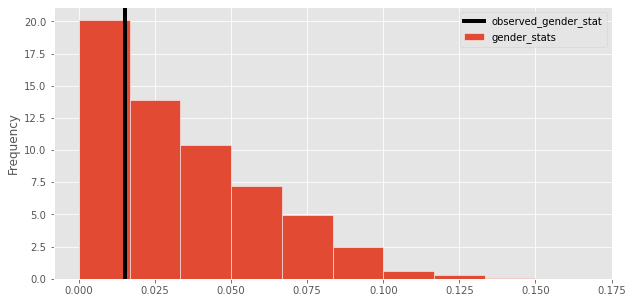

In [58]:
gender_stats = np.array([])
for i in np.arange(10000):
    sample = abs(np.random.choice([1, 0], baker_count, p=[0.5, 0.5]).sum()/baker_count - 0.5)
    gender_stats = np.append(gender_stats, sample)
    
# Visualize with a histogram
bpd.DataFrame().assign(gender_stats=gender_stats).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_gender_stat, color='black', linewidth=4, label='observed_gender_stat')
plt.legend();

In [59]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Recall that your null hypothesis was that the bakers on the show are drawn randomly from a population that’s 50% female and 50% male. Compute the p-value for this hypothesis test, and save the result to `gender_p_value`.

In [60]:
gender_p_value = np.count_nonzero(gender_stats <= observed_gender_stat)/10000
gender_p_value

0.3352

In [61]:
grader.check("q3_5")

q3_5 results: All test cases passed!

You should find that the p-value is nowhere near the standard cutoff of 0.05 for statistical significance. So in this case, we fail to reject the null. 

It's important to note that even though we fail to reject the null, we’re not saying that bakers *were* necessarily drawn randomly from a population that’s 50% female and 50% male. In fact, nothing is random about how people get to be on the show. 

There are a lot of rules about who can apply to be on the show, and applicants are thoroughly vetted through an extensive [application process](https://gbbo.take-part.co.uk/info/rules) that involves an interview and a background check to ensure that none of the bakers have any sort of professional training or are friends or relatives of the judges. Simply put, bakers on the show are not selected via a purely random process.

When we say we fail to reject the null, this means that the bakers *could have* been drawn from a model that's 50% female and 50% male, but it doesn't mean they *were*.


**Question 3.6.** Conceptually, how would you expect the statistics in `gender_stats` to change if `baker_count` were a much larger value, like if the show included hundreds of bakers every season? What effect would that have on the result of the hypothesis test?

From the options below, save the number of your choice in the variable`gender_stats_change`.

1. The values in `gender_stats` would be **smaller**. We'd be **less** likely to reject the null hypothesis if `observed_gender_stat` remained the same.
2. The values in `gender_stats` would be **smaller**. We'd be **more** likely to reject the null hypothesis if `observed_gender_stat` remained the same.
3. The values in `gender_stats` would be **about the same**. We'd be **equally** likely to reject the null hypothesis if `observed_gender_stat` remained the same.
4. The values in `gender_stats` would be **larger**. We'd be **less** likely to reject the null hypothesis if `observed_gender_stat` remained the same.
5. The values in `gender_stats` would be **larger**. We'd be **more** likely to reject the null hypothesis if `observed_gender_stat` remained the same.


In [62]:
gender_stats_change = 4
gender_stats_change

4

In [63]:
grader.check("q3_6")

q3_6 results: All test cases passed!

<a id='section4'></a>
## Section 4. Well-Deserved? 🥇

In this section, we will use permutation testing to decide if different groups of bakers have similar technical abilities, as measured by their rankings in the Technical Challenges. Let's start by looking at our `baker_weeks` DataFrame which has a row for each baker for each week of the show, including for the remainder of the season after they've been eliminated. Let's start by only keeping the data for the bakers that actually competed in each week's episode. Since ten bakers participated in the first episode of Season 1, we'll look at the first ten rows of the resulting `competed` DataFrame. 

In [64]:
competed = baker_weeks[baker_weeks.get('Competed') == 1]
competed.take(np.arange(10))

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0
5,"Series 1, Episode 1",1,1,Mary,Cake,Lea,F,51,0,10.0,0,0,1,1,0
6,"Series 1, Episode 1",1,1,Mary,Cake,Louise,F,44,0,NaN,0,0,1,1,0
7,"Series 1, Episode 1",1,1,Mary,Cake,Mark,M,48,0,NaN,0,0,0,1,0
8,"Series 1, Episode 1",1,1,Mary,Cake,Miranda,F,37,0,8.0,0,0,0,1,0
9,"Series 1, Episode 1",1,1,Mary,Cake,Ruth,F,31,0,NaN,0,0,0,1,0


In the `'Technical Rank'` column, contestants are given a ranking for how well they performed in the Technical Challenge, with 1 being the best. Notice in the first ten rows of `competed` shown above, some of the middle rankings are missing. In this episode, the judges didn't reveal everyone's rank and instead just pointed out the top three and bottom three contestants. For reasons like this, our dataset has just a few missing values, which we will ignore for this section. 

If we want to get a sense of how skilled a baker is, the technical rank is helpful, but needs to be taken in the context of the number of contestants still in the competition. For example, ranking 3rd place in the first week is a lot more impressive than ranking 3rd place in the final week, when there are just three bakers remaining. To address this problem, we'll convert these rankings into *percentiles* to measure skill relative to the number of contestants remaining. 

For example, if there are four contestants remaining, a technical ranking of:
- 4 corresponds to the 25th percentile
- 3 corresponds to the 50th percentile
- 2 corresponds to the 75th percentile
- 1 corresponds to the 100th percentile

**Question 4.1.** Create a DataFrame called `perc` with the same data as `competed`, plus a new column called `'Contestants'`  that contains the number of contestants that competed each week. For example, since the first ten rows of `competed` all correspond to the first week of the first season, in which there were 10 bakers, the first ten entries of the `'Contestants'` column should be 10.  

We've provided the code to use the `'Contestants'` column and the `'Technical Rank'` column to calculate the percentiles, which we've added in a column called `'Percentile'`.

*Hint*: Start by counting the number of bakers in each episode.

In [65]:
total_num=np.array([])
for i in np.arange(competed.groupby('Episode').count().shape[0]):
    number = competed.groupby('Episode').count().iloc[i].get('Season')
    total_num = np.append(total_num, [number] * number)
total_num

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  6.,  6.,  6.,  6.,  6.,  6.,  5.,  5.,
        5.,  5.,  5.,  4.,  4.,  4.,  4.,  3.,  3.,  3., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,  3.,  3.,  3.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  6.,  6.,  6.,
        6.,  6.,  6.,  5.,  5.,  5.,  5.,  5.,  4.,  4.,  4.,  4., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,  3.,  3.,
        3., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  6.,  6.,  6.,  6.,  6

In [66]:
# Your task is to add the Contestants column.
perc = competed.assign(Contestants = total_num)
# We've added the Percentile column for you.
perc = perc.assign(Percentile = np.round((1 - (perc.get('Technical Rank') - 1) / perc.get('Contestants')) * 100, 1))
perc

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner,Contestants,Percentile
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0,10.0,90.0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0,10.0,80.0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1,10.0,100.0
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0,10.0,NaN
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Laura,F,31,0,4.0,0,0,0,1,0,5.0,40.0
1241,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Peter,M,20,0,1.0,0,1,0,1,1,4.0,100.0
1244,"Series 11, Episode 10",11,10,Prue,Final,Dave,M,30,0,1.0,0,0,1,1,0,4.0,100.0
1246,"Series 11, Episode 10",11,10,Prue,Final,Laura,F,31,0,3.0,0,0,1,1,0,4.0,50.0


In [67]:
grader.check("q4_1")

q4_1 results: All test cases passed!

Now we are ready to compare two groups of bakers to see if they are comparably skilled. Let's start with comparing the winners to the non-winners. We'll conduct a permutation test with the following hypotheses.

- **Null Hypothesis** : The `'Percentile'` data for winners comes from the same distribution as the `'Percentile'` data for non-winners. In other words, winners and non-winners perform equally well in Technical Challenges.
- **Alternate Hypothesis** : The `'Percentile'` data for winners and the `'Percentile'` data for non-winners come from different distributions. Winners perform better in Technical Challenges than non-winners.

As usual, we'll use the difference in group means as our test statistic. Here, we'll compute that as the mean for the winners minus the mean for the non-winners.

**Question 4.2.** What is the observed value of the test statistic? Save your answer as `observed`.

In [68]:
mean = perc.groupby('Winner').mean()

observed = mean.get('Percentile').loc[1] - mean.get('Percentile').loc[0]
observed

18.21252395695121

In [69]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Create 1000 simulated values of the test statistic under the assumptions of the null hypothesis, and save your simulated test statistics in the array `simulated_stats`.  Then create an appropriate visualization showing the distribution of the values in `simulated_stats` array. It may be helpful to also plot the observed value of the test statistic on the same graph. 

In [70]:
 perc.assign(Winner = np.random.permutation(perc.get('Winner')))

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner,Contestants,Percentile
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0,10.0,90.0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0,10.0,80.0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,0,10.0,100.0
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,1,10.0,NaN
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Laura,F,31,0,4.0,0,0,0,1,1,5.0,40.0
1241,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Peter,M,20,0,1.0,0,1,0,1,1,4.0,100.0
1244,"Series 11, Episode 10",11,10,Prue,Final,Dave,M,30,0,1.0,0,0,1,1,0,4.0,100.0
1246,"Series 11, Episode 10",11,10,Prue,Final,Laura,F,31,0,3.0,0,0,1,1,0,4.0,50.0


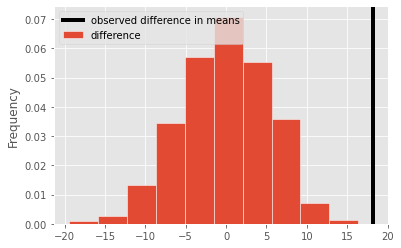

In [71]:
# Run your simulation here.
def difference(data):
    mean = data.groupby('Winner').mean()
    return mean.get('Percentile').loc[1] - mean.get('Percentile').loc[0]

simulated_stats = np.array([])
for i in np.arange(1000):
    shuffled = perc.assign(Winner = np.random.permutation(perc.get('Winner')))
    stat = difference(shuffled)
    simulated_stats = np.append(simulated_stats, stat)
    
simulated_stats = simulated_stats

# Plot your visualization here.
bpd.DataFrame().assign(difference=simulated_stats).plot(kind='hist', density=True, ec='w')
plt.axvline(observed, color='black', linewidth=4, label='observed difference in means')
plt.legend();

In [72]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** The winning contestants claim that they are more technically skilled than the other contestants. Based on your permutation test, using a p-value cutoff of 0.01, do you think this claim is likely accurate? Set `winners_claim` to True or False.

In [73]:
winners_claim = True
winners_claim

True

In [74]:
grader.check("q4_4")

q4_4 results: All test cases passed!



Now, we'll do a similar permutation test, but this time comparing the Technical Challenge `'Percentile'` of contestants who received a coveted handshake 🤝 from Paul Hollywood at least once to those who never did.


![](https://media.giphy.com/media/3o7TKRoSl2BrFuK75u/giphy.gif)

**Question 4.5.** Create a new DataFrame called `earned`, indexed by `'Season'` and `'Baker'`, that has a row for each baker who received a handshake 🤝 **at any point** in the season, and a single column called `'Handshake'` containing all ones. 

Similarly, create a DataFrame called `not_earned`, indexed by `'Season'` and `'Baker'`, that has a row for each baker who **never** received a handshake 🤝, and a single column called `'Handshake'` containing all zeros. 

*Note*: There are several bakers by the same name, but never in the same season.

*Hint*: Check out the functions [`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) and [`np.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html).

In [75]:
handshake = perc.groupby(['Season', 'Baker']).sum()
shake = handshake[(handshake.get('Signature Handshake') !=0) | (handshake.get('Showstopper Handshake') !=0)]

In [76]:
earned = shake.assign(Handshake=np.ones(shake.shape[0])).get(['Handshake'])
earned

Handshake
Season Baker             
3      Ryan           1.0
4      Frances        1.0
5      Luis           1.0
       Norman         1.0
6      Nadiya         1.0
...                   ...
10     David          1.0
       Henry          1.0
       Michael        1.0
       Steph          1.0
11     Lottie         1.0

[27 rows x 1 columns]

In [77]:
grader.check("q4_5_a")

q4_5_a results: All test cases passed!

In [78]:
noshake = handshake[(handshake.get('Signature Handshake')==0) & (handshake.get('Showstopper Handshake')==0)]
noshake

Week Number  Age  Signature Handshake  Technical Rank  \
Season Baker                                                              
1      Annetha              3   60                    0             9.0   
       David               10  124                    0            20.0   
       Edd                 21  144                    0            13.0   
       Jasminder           15  225                    0            13.0   
       Jonathan             6   75                    0            16.0   
...                       ...  ...                  ...             ...   
11     Marc E              36  408                    0            46.0   
       Mark L              21  192                    0            23.0   
       Peter               55  200                    0            31.0   
       Rowan                6  165                    0            24.0   
       Sura                10  124                    0            21.0   

                  Showstopper Handshake  Star Baker  Eliminated  Competed  \
Season Baker                                                                
1      Annetha                        0           0           1         2   
       David                          0           0           1         4   
       Edd                            0           0           0         6   
       Jasminder                      0           0           1         5   
       Jonathan                       0           0           1         3   
...                                 ...         ...         ...       ...   
11     Marc E                         0           1           1         8   
       Mark L                         0           1           1         6   
       Peter                          0           3           0        10   
       Rowan                          0           0           1         3   
       Sura                           0           0           1         4   

                  Winner  Contestants  Percentile  
Season Baker                                       
1      Annetha         0         18.0       115.0  
       David           0         29.0       162.5  
       Edd             6         36.0       372.5  
       Jasminder       0         33.0       225.8  
       Jonathan        0         24.0       136.7  
...                  ...          ...         ...  
11     Marc E          0         68.0       380.1  
       Mark L          0         57.0       416.6  
       Peter          10         76.0       740.7  
       Rowan           0         33.0       102.4  
       Sura            0         41.0       219.5  

[105 rows x 11 columns]

In [79]:
not_earned = noshake.assign(Handshake=np.zeros(noshake.shape[0])).get(['Handshake'])
not_earned

Handshake
Season Baker               
1      Annetha          0.0
       David            0.0
       Edd              0.0
       Jasminder        0.0
       Jonathan         0.0
...                     ...
11     Marc E           0.0
       Mark L           0.0
       Peter            0.0
       Rowan            0.0
       Sura             0.0

[105 rows x 1 columns]

In [80]:
grader.check("q4_5_b")

q4_5_b results: All test cases passed!

Our `earned` and `not_earned` DataFrames contain the information we need to determine who falls into which group for our permutation test, but we need to combine this data with the Technical Challenge percentiles in `perc`. 

The first step is to combine the rows of `earned` and with those of `not_earned`. We'll do this using the `babypandas` DataFrame method `.append`, which is similar to the familiar `np.append`, but for DataFrames instead of arrays. The cell below puts the rows of `not_earned` onto the end of `earned` and saves the result as `shakes`. Don't worry if you see a warning; ignore it.

In [81]:
shakes = earned.append(not_earned)
shakes

/opt/conda/lib/python3.9/site-packages/babypandas/bpd.py:1533: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = func(*vargs, **kwargs)


Handshake
Season Baker             
3      Ryan           1.0
4      Frances        1.0
5      Luis           1.0
       Norman         1.0
6      Nadiya         1.0
...                   ...
11     Marc E         0.0
       Mark L         0.0
       Peter          0.0
       Rowan          0.0
       Sura           0.0

[132 rows x 1 columns]

Now we need to merge `shakes` with `perc` to get the handshake 🤝 data and the percentile data in one DataFrame. Since there are multiple bakers that share a name, we need to merge by *both* `'Season'` and `'Baker'`, which we can do by merging on a `list` containing both column names. Run the cell below to complete the merge and save the result as `perc_shakes`.

In [82]:
perc_shakes = perc.merge(shakes, left_on=['Season', 'Baker'], right_index=True)
perc_shakes

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner,Contestants,Percentile,Handshake
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0,10.0,90.0,0.0
10,"Series 1, Episode 2",1,2,Mary,Biscuits,Annetha,F,30,0,7.0,0,0,1,1,0,8.0,25.0,0.0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0,10.0,80.0,0.0
11,"Series 1, Episode 2",1,2,Mary,Biscuits,David,M,31,0,8.0,0,0,0,1,0,8.0,12.5,0.0
21,"Series 1, Episode 3",1,3,Mary,Bread,David,M,31,0,4.0,0,0,0,1,0,6.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,"Series 11, Episode 3",11,3,Prue,Bread,Rowan,M,55,0,10.0,0,0,1,1,0,10.0,10.0,0.0
1147,"Series 11, Episode 1",11,1,Prue,Cake,Sura,F,31,0,1.0,0,0,0,1,0,12.0,100.0,0.0
1159,"Series 11, Episode 2",11,2,Prue,Biscuits,Sura,F,31,0,6.0,0,0,0,1,0,11.0,54.5,0.0
1171,"Series 11, Episode 3",11,3,Prue,Bread,Sura,F,31,0,7.0,0,0,0,1,0,10.0,40.0,0.0


**Question 4.6.** Now perform a permutation test, mimicking the procedure of Question 4.3, to help you analyze the following claim. 

The contestants who have gotten a handshake 🤝 claim that they are more technically skilled than the other contestants. Based on your permutation test, using a p-value of cutoff of 0.01, do you think this claim is likely accurate? Set `handshake_claim` to True or False.

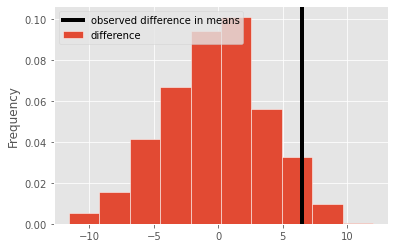

In [83]:
def difference_shake(data):
    mean = data.groupby('Handshake').mean()
    return mean.get('Percentile').loc[1] - mean.get('Percentile').loc[0]

simulated_shakes = np.array([])
for i in np.arange(1000):
    shuffled = perc_shakes.assign(Winner = np.random.permutation(perc_shakes.get('Handshake')))
    stat = difference(shuffled)
    simulated_shakes = np.append(simulated_shakes, stat)
    
simulated_shakes
observed_shakes = difference_shake(perc_shakes)

# Plot your visualization here.
bpd.DataFrame().assign(difference=simulated_shakes).plot(kind='hist', density=True, ec='w')
plt.axvline(observed_shakes, color='black', linewidth=4, label='observed difference in means')
plt.legend();

In [84]:
np.count_nonzero(simulated_shakes >= observed_shakes) / 1000

0.044

In [85]:
handshake_claim = False
handshake_claim

False

In [86]:
grader.check("q4_6")

q4_6 results: All test cases passed!

<a id='section5'></a>
## Section 5: Devilishly Difficult Challenges 😈

Contestants on the Great British Bake Off sometimes groan when the hosts announce that the upcoming Technical Challenge was chosen by judge Paul Hollywood. Paul has a reputation for posing exceptionally difficult challenges and most bakers believe that his recipes are much harder than those of his co-judges, Mary Berry and Prue Leith. We want to examine whether this theory is justified by the data. 

The `technical_challenge_recipes` DataFrame contains 83 Technical Challenge recipes from seasons 1 through 9. Each Technical Challenge is posed by one particular judge, and comes from their personal collection of recipes. In the first nine seasons, Mary posed 32 Technical Challenges, Paul posed 41, and Prue posed 10. The `technical_challenge_recipes` DataFrame includes a `'DifficultyScore'` for each recipe, with more challenging recipes having higher scores.

**Question 5.1.** Create a DataFrame `mean_by_judge` with the judge's name as the index and just one column called `'mean_difficulty_score'` that contains the mean difficulty score for each judge's Technical Challenges. 

In [87]:
mean_by_judge = technical_challenge_recipes.assign(mean_difficulty_score = technical_challenge_recipes.get('DifficultyScore')).groupby('Whose').mean().get(['mean_difficulty_score'])
mean_by_judge

,mean_difficulty_score
Whose,
Mary,4.900000
Paul,4.702439
Prue,7.240000


In [88]:
grader.check("q5_1")

q5_1 results: All test cases passed!

If you solved this problem correctly, you will notice that Mary and Paul both have an average difficulty of less than 5, whereas Prue has a mean difficulty greater than 7. Does it mean that Prue, in fact, is the devil when it comes to Technical Challenges? In other words, does Prue have a much more challenging recipe collection than the other judges? Or is this all by chance?

Suppose each judge has an extensive personal recipe collection with recipes of varying difficulty, and the Technical Challenges for each episode are drawn randomly from this collection. We want to estimate the average difficulty of all recipes in each judge's collection. Unfortunately, we don't have access to a judge's entire recipe collection, we only have access to the sample of recipes they've used for Technical Challenges in the Great British Bake Off. Thus, we will tackle this problem using **bootstrapping**. 

**Question 5.2.** Below, write a function called `simulate_estimates`. It should take 3 arguments:
- `sample_df`: A DataFrame with a row for each element of the original sample. In this case, it will consist of Technical Challenges posed by a particular judge.
- `variable`: The column name of the relevant variable, whose mean we want to estimate.
- `repetitions`: The number of repetitions to perform (i.e., the number of resamples to create).

It should take `repetitions` resamples with replacement from the given DataFrame. For each of those resamples, it should compute the mean of the relevant variable for that resample. Then it should return an array containing the value of those means for each resample.

In [89]:
technical_challenge_recipes

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
1,1,2,Scone,Paul,https://thegreatbritishbakeoff.co.uk/scones/,1,5,15,6,1.8
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
4,1,5,Cornish pasties,Paul,https://www.bbc.com/food/recipes/classic_corni...,2,11,32,4,3.4
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


In [90]:
def simulate_estimates(sample_df, variable, repetitions):
    '''Returns an array of length repetitions, containing bootstrapped means of the variable from sample_df. '''
    means = np.array([])
    
    for i in np.arange(repetitions):
        sample = sample_df.sample(sample_df.shape[0], replace=True)
        resample = sample.get(variable).mean()
        means = np.append(means, resample)
    return means

In [91]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** Use your function `simulate_estimates` to estimate the mean difficulty score of three judges' recipe collections. Use `repetitions = 5000`, and save your arrays of bootstrapped means for each judge in the variables `mary_boot_means`, `paul_boot_means`, and `prue_boot_means`.  

Then, plot the distributions of all three of these arrays in one overlaid histogram. Use `bins=np.arange(2,10,0.2)` and set `alpha=0.5` (this changes the opacity to see the distribution more clearly).

*Hint:* Create a DataFrame with one column for each judge's bootstrapped means, and use this to plot the histogram.

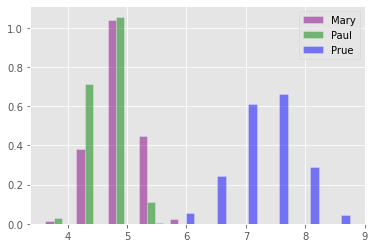

In [92]:
mary_boot_means = simulate_estimates(technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Mary'], 
                                    'DifficultyScore', 5000)
paul_boot_means = simulate_estimates(technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Paul'], 
                                    'DifficultyScore', 5000)
prue_boot_means = simulate_estimates(technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Prue'], 
                                    'DifficultyScore', 5000)

# Plot your overlaid histogram here.
plt.hist([mary_boot_means, paul_boot_means, prue_boot_means], density=True,alpha=0.5, ec='w', color=['purple', 'green', 'blue'], label=['Mary', 'Paul', 'Prue'])
    
plt.legend()

In [93]:
grader.check("q5_3")

q5_3 results: All test cases passed!

**Question 5.4.** Now we want to calculate three 95% confidence intervals for the mean difficulty score of recipes from each of the three judges. To do this, create a function `confidence_interval_95`, which takes in an array of bootstrapped statistics `boot_stats` and returns a list of length two, containing the left endpoint and the right endpoint of the 95% confidence interval. 

In [94]:
def confidence_interval_95(boot_stats):
    '''Returns a list of the endpoints of a 95% confidence interval based on boot_stats.'''
    return [np.percentile(boot_stats, 2.5), np.percentile(boot_stats, 97.5)]

print("Mary 95% CI:", confidence_interval_95(mary_boot_means))
print("Paul 95% CI:", confidence_interval_95(paul_boot_means))
print("Prue 95% CI:", confidence_interval_95(prue_boot_means))

Mary 95% CI: [4.225000000000002, 5.568750000000001]
Paul 95% CI: [4.151219512195123, 5.253658536585366]
Prue 95% CI: [6.1, 8.26]


In [95]:
grader.check("q5_4")

q5_4 results: All test cases passed!

**Question 5.5.** Based on your results, which of the following statements are correct? Assign `true_statements` to a list containing **all** the true statements. 

1. Paul's recipes are generally harder than those of his co-judges.
2. Prue's recipes are generally harder than those of her co-judges.
3. Prue and Mary's confidence intervals overlap.
4. Mary and Paul's confidence intervals overlap.
5. Mary's confidence interval is wider than Paul's.
6. Prue's confidence interval is wider than Mary's.

In [96]:
true_statements = [2, 4, 5, 6]
true_statements

[2, 4, 5, 6]

In [97]:
grader.check("q5_5")

q5_5 results: All test cases passed!

**Question 5.6.** If your calculation is correct, you will see that Prue's confidence interval is almost twice as wide as the other two judges' confidence intervals. Why is Prue's confidence interval wider? 

Assign either 1, 2, or 3 to the variable `why_wider` below.

1. She has more challenging recipes in her collection.
2. She has posed fewer Technical Challenges.
3. She has posed Technical Challenges with a wider range of difficulty levels.

In [98]:
why_wider = 3
why_wider

3

In [99]:
grader.check("q5_6")

q5_6 results: All test cases passed!

From what we've done so far, it's clear that Prue's recipes have a very different difficulty level than the recipes of the other two judges. Now let's address a different question: how does the average difficulty of Paul's recipes compare to the average difficulty of Mary's recipes? 

**Question 5.7.** Create a DataFrame called `mary_only` containing only the recipes in our original `technical_challenge_recipes` sample from Mary's collection. Then, create another DataFrame called `paul_only` containing only the recipes in our original sample from Paul's collection. Then, set `observed_diff_mean` to the difference in mean difficulty score between Mary's recipes and Paul's recipes in our sample (subtract in the order Mary minus Paul).

In [100]:
mary_only = technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Mary']
paul_only = technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Paul']
observed_diff_mean = mary_only.get('DifficultyScore').mean() - paul_only.get('DifficultyScore').mean()
observed_diff_mean

0.19756097560975672

In [101]:
grader.check("q5_7")

q5_7 results: All test cases passed!

So there is definitely a difference in mean difficulty scores between Mary's and Paul's Technical Challenge recipes, within our sample of recipes that have appeared as Technical Challenges in the show. But does this reflect a difference in mean recipe difficulty scores in the population (the judges' recipe collections), or was it by chance that our sample's difficulty displayed this difference? Let's do a hypothesis test to find out. We'll state our hypotheses as follows:

- **Null Hypothesis:** The mean difficulty of Mary's recipe collection equals the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipes equals 0.
- **Alternative Hypothesis:** The mean difficulty of Mary's recipe collection does not equal the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipe does not equal 0.

Since we were able to set up our hypothesis test as a question of whether our population parameter – the difference in mean difficulty scores for Mary's and Paul's recipe collections – is equal to a certain value, we can **test our hypotheses by constructing a confidence interval for the parameter**. This is the method we used in Lecture 19 to test whether the median salary of Fire-Rescue Department workers was the same as the median salary of all San Diego city employees. We also did a similar example in Homework 5 Question 3 (Live Crystal Scoops 🔮). For a refresher on this method, you can read more about conducting a hypothesis test with a confidence interval in [CIT 13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html#).

**Question 5.8.** Compute 1000 bootstrapped estimates for the difference in the mean difficulty for Mary's recipes and Paul's recipes (subtract in the order Mary minus Paul). Store your 1000 estimates in the `difference_means` array.

You should generate your resamples of Mary's recipes by sampling from `mary_only`, and similarly for Paul, by sampling from `paul_only`. You should not use `technical_challenge_recipes` at all.

In [102]:
np.random.seed(57) # Don't change this. This is for the autograder.

difference_means = simulate_estimates(mary_only, 'DifficultyScore', 1000) - simulate_estimates(paul_only, 'DifficultyScore', 1000)

# Just display the first ten differences.
difference_means[:10]

array([ 0.4304878 ,  0.45609756,  0.36829268,  0.31097561,  0.90167683,
        0.45518293,  0.6527439 , -0.07606707,  1.10685976,  0.35960366])

In [103]:
grader.check("q5_8")

q5_8 results: All test cases passed!

Let's visualize your estimates:

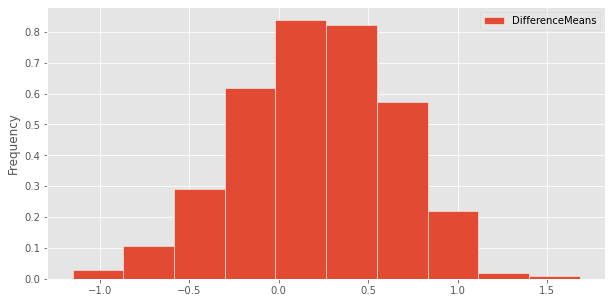

In [104]:
(bpd.DataFrame().assign(DifferenceMeans = difference_means)
 .plot(kind='hist', density=True, ec='w', figsize=(10, 5)));

**Question 5.9.** Use the function `confidence_interval_95` you created before to compute a 95% confidence interval for the difference in the mean difficulty of Mary's and Paul's recipes (as before, Mary's minus Paul's). Assign to `mary_paul_difference_CI` a list containing the endpoints of this confidence interval.

In [105]:
mary_paul_difference_CI = confidence_interval_95(difference_means)
mary_paul_difference_CI

[-0.669062499999999, 1.0327934451219507]

In [106]:
grader.check("q5_9")

q5_9 results: All test cases passed!

Recall the hypotheses we were testing:
- **Null Hypothesis:** The mean difficulty of Mary's recipe collection equals the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipes equals 0.
- **Alternative Hypothesis:** The mean difficulty of Mary's recipe collection does not equal the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipe does not equal 0.

**Question 5.10.** Based on the confidence interval you've created, would you reject the null hypothesis at the 0.05 significance level? Set `reject_null_mary_paul` to True if you would reject the null hypothesis, and False if you would not.

In [107]:
reject_null_mary_paul = False
reject_null_mary_paul

False

In [108]:
grader.check("q5_10")

q5_10 results: All test cases passed!

We have now uncovered some interesting facts about the difficulty levels of the different judges' recipe collections. However, we also want to know whether the judges' recipe collections have other differences. For example, do certain judges have recipes with more ingredients, more components, or longer instructions?

To do this, we want to generalize our simulation code so that we can create a confidence interval for any variable.

**Question 5.11.** Create a function called `bootstrap_estimation`, which takes in 4 inputs:
- `sample_df`, A DataFrame with a row for each element of the original sample (Technical Challenge recipes posed by one or more judges)
- `judges`, a list of judge's names we want to compare, which can include any number of "Paul", "Mary", and "Prue"
- `variable`, the column name of the relevant variable, whose mean we want to estimate 
- `repetitions`, the number of repetitions to perform (i.e., the number of resamples to create)

The function should adhere to these specifications:
1. The function should generate an overlaid histogram showing each of the specified judges' simulated means of the given variable. Make sure to give your histogram a descriptive title and to use appropriate labels. Use `bins=20`, `alpha=0.5`, and `figsize=(10,5)`.
2. The function should print a statement with the 95% confidence interval for the mean value of the given variable for each of the specified judges. See the example below for the type of statement to print, but the exact formatting is up to you.
3. The function should return nothing.

*Hints:* 
- This is designed to be a challenging question, but remember that you can use any of the functions you've already created. 
- Our solution uses an `if`-statement to assign columns named `'Mary_mean_estimate'`, `'Paul_mean_estimate'`, or `'Prue_mean_estimate'`.

Here is an example output that shows a comparison of estimates for the mean number of dirty dishes produced by recipes in each of the three judges' collections.
<img src="images/desired_output.jpg" width = 700>

Mary's 95% CI for Dishes: [5.0625, 7.0]
Paul's 95% CI for Dishes: [5.829268292682927, 7.585365853658536]
Pure's 95% CI for Dishes: [8.0, 13.3]


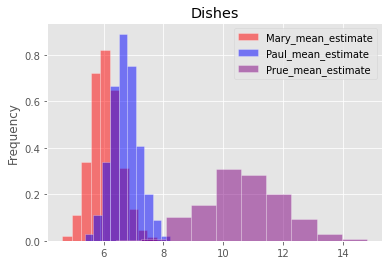

In [109]:
def bootstrap_estimation(sample_df, judges, variable, repetitions):
    '''Generates a histogram and for each judge, a confidence interval for the mean value of the variable from sample_df.'''
    if 'Mary'in judges:
        #Mary = simulate_estimates(sample_df[sample_df.get('Whose')=='Mary'], variable, repetitions)
        plt.hist([simulate_estimates(sample_df[sample_df.get('Whose')=='Mary'], variable, repetitions)], density=True,alpha=0.5, ec='w', color=['red'], label=['Mary_mean_estimate'])
        print('Mary\'s 95% CI for '+ variable + ':', confidence_interval_95(simulate_estimates(sample_df[sample_df.get('Whose')=='Mary'], variable, repetitions)))
    if 'Paul'in judges:
        #Paul = simulate_estimates(sample_df[sample_df.get('Whose')=='Paul'], variable, repetitions)
        plt.hist([simulate_estimates(sample_df[sample_df.get('Whose')=='Paul'], variable, repetitions)], density=True,alpha=0.5, ec='w', color=['blue'], label=['Paul_mean_estimate'])
        print('Paul\'s 95% CI for '+ variable + ':', confidence_interval_95(simulate_estimates(sample_df[sample_df.get('Whose')=='Paul'], variable, repetitions)))
    if 'Prue'in judges:
        #Prue = simulate_estimates(sample_df[sample_df.get('Whose')=='Prue'], variable, repetitions)
        plt.hist([simulate_estimates(sample_df[sample_df.get('Whose')=='Prue'], variable, repetitions)], density=True,alpha=0.5, ec='w', color=['purple'], label=['Prue_mean_estimate'])
        print('Pure\'s 95% CI for '+ variable + ':', confidence_interval_95(simulate_estimates(sample_df[sample_df.get('Whose')=='Prue'], variable, repetitions)))
        
    #if 'Mary' and 'Paul' and 'Prue' in judges:  
     #   plt.hist([Mary, Paul, Prue], density=True,alpha=0.5, ec='w', color=['purple', 'green', 'blue'], label=['Mary', 'Paul', 'Prue'])
    #if 'Paul' and 'Prue'in judges:
     #   plt.hist([Paul, Prue], density=True,alpha=0.5, ec='w', color=['purple', 'green', 'blue'], label=['Mary', 'Paul', 'Prue'])
    plt.legend()
    plt.ylabel('Frequency')
    plt.title(variable)
    return 
# Try to replicate the graph shown in the example.
bootstrap_estimation(technical_challenge_recipes, ['Mary','Paul', 'Prue'], 'Dishes', 1000)

**Question 5.12.** Using the `bootstrap_estimation` function you just wrote, create histograms and confidence intervals that would help you answer each of the following questions. Use `repetitions=1000`. 

1. Whose recipes have more sentences on average, Mary's or Paul's?
2. Of the three judges, how do their average counts of recipe ingredients compare?

For each part, all you need to do is make one call to `bootstrap_estimation` with the appropriate inputs.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5_12
manual: True
points: 2

-->

In [110]:
technical_challenge_recipes

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
1,1,2,Scone,Paul,https://thegreatbritishbakeoff.co.uk/scones/,1,5,15,6,1.8
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
4,1,5,Cornish pasties,Paul,https://www.bbc.com/food/recipes/classic_corni...,2,11,32,4,3.4
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


Mary's 95% CI for RecipeSentences: [28.02734375, 38.503125]
Paul's 95% CI for RecipeSentences: [24.828658536585365, 31.879268292682926]


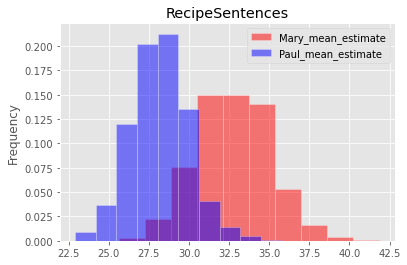

In [111]:
# For question 1, make your function call here.

bootstrap_estimation(technical_challenge_recipes, ['Mary','Paul'], 'RecipeSentences', 1000)

<!-- END QUESTION -->

Mary's 95% CI for IngredCount: [9.0625, 11.18828125]
Paul's 95% CI for IngredCount: [9.463414634146341, 12.51280487804878]
Pure's 95% CI for IngredCount: [12.7, 15.9]


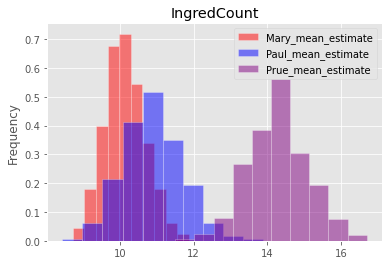

In [112]:
# For question 2, make your function call here.

bootstrap_estimation(technical_challenge_recipes, ['Mary','Paul', 'Prue'], 'IngredCount', 1000)

Feel free to explore other questions with other variables as you wish. But at this point, the devilish judge should be clear!  😈

<a id='section6'></a>
## Section 6: Piece of Cake? 🍰

In this section of the project, we'll focus on probability.

**Question 6.1.** You wonder if it takes a lot of skill to win the bake off. If we randomly select a (series) winner from the first ten seasons of the show, what is the probability that they came first in one of the Technical Challenges? Use the `bakers` DataFrame to calculate this probability and assign your answer to the variable `p_tech_given_win`.



In [113]:
series_win = bakers[bakers.get('series_winner')!=0]
series_win[series_win.get('technical_winner')!=0].shape[0]

10

In [114]:
p_tech_given_win = series_win[series_win.get('technical_winner')!=0].shape[0]/series_win.shape[0]
p_tech_given_win

1.0

In [115]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Question 6.2.** You wonder how frequently winners are recognized with the special designation of Star Baker ⭐. If we randomly select a winner from the first ten seasons of the show, what is the probability that they won Star Baker ⭐ at some point? Assign your answer to the variable `p_star_given_win`.

In [116]:
series_win[series_win.get('star_baker')!=0]

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
15,2,Joanne,1,3,4,4,1.0,11.0,4.5,1,...,100.0,50.0,"Joanne ""Jo"" Wheatley",41,Housewife,"Ongar, Essex",Wheatley,Joanne,F,Middle-Aged
26,3,John,1,1,6,4,1.0,11.0,3.0,1,...,100.0,60.0,John Whaite,22,Law student,Wigan,Whaite,John,M,Young
38,4,Frances,1,1,7,3,1.0,8.0,3.0,1,...,100.0,70.0,Frances Quinn,31,Children's Clothes Designer,"Market Harborough, Leicestershire",Quinn,Frances,F,Young
56,5,Nancy,1,3,7,3,1.0,5.0,2.5,1,...,100.0,70.0,Nancy Birtwhistle,60,Retired Practice Manager,"Barton-upon-Humber, Lincolnshire",Birtwhistle,Nancy,F,Elderly
65,6,Nadiya,1,4,4,6,1.0,12.0,4.0,1,...,100.0,40.0,Nadiya Hussain,30,Full-time mother,Leeds / Luton,Hussain,Nadiya,F,Young
73,7,Candice,1,1,7,3,1.0,8.0,2.5,1,...,100.0,70.0,Candice Brown,31,PE teacher,"Barton-Le-Clay, Bedfordshire",Brown,Candice,F,Young
90,8,Sophie,1,2,6,4,1.0,6.0,2.5,1,...,100.0,60.0,Sophie Faldo,33,Former army officer and trainee stuntwoman,"West Molesey, Surrey",Faldo,Sophie,F,Young
104,9,Rahul,1,1,5,5,1.0,7.0,3.5,1,...,100.0,50.0,Rahul Mandal,30,Research scientist,Rotherham,Mandal,Rahul,M,Young
110,10,David,1,2,8,2,1.0,10.0,2.0,1,...,100.0,80.0,David Atherton,36,International health adviser,Whitby,Atherton,David,M,Young


In [117]:
p_star_given_win = series_win[series_win.get('star_baker')!=0].shape[0]/series_win.shape[0]
p_star_given_win

0.9

In [118]:
grader.check("q6_2")

q6_2 results: All test cases passed!

Notice that in both of the previous questions, you calculated a conditional probability. Among bakers who satisfy one condition (winning), what is the probability they satisfy another condition (placing first in a technical, or earning Star Baker ⭐). Let's generalize the code for these calculations so that we can more easily compute conditional probabilities with other conditions.

**Question 6.3.** Your job is to implement the function `conditional_probability`. It has two arguments, `find` and `given`, both of which are lists. Let's walk through how it works, using an example – suppose we want to use it to compute the probability that a randomly selected contestant from `bakers` was a Star Baker ⭐, given that they won (the same probability that you computed in the previous question.)

- `find` is a list of two elements:
    - The first element in `find` is the column in `bakers` that contains the event that we are trying to find the probability of. This can be any column in `baker`; in our example, this is `'star_baker'`. 
    - The second element in `find` is the value in the aforementioned column that we're trying to find; in our example, this is `1`.
- `given` is a list of two elements:
    - The first element in `given` is the column in `bakers` that contains the event that we are given to be true. This can also be any column in `baker`; in our example, this is `'series_winner'`. 
    - The second element in `given` is the value in the aforementioned column; in our example, this is `1`.

Putting this all together, this means that `conditional_probability(['star_baker', 1], ['series_winner', 1])` should evaluate to your answer from the previous part (but the `conditional_probability` function should work for any example, not just this one).


In [119]:
series_win = bakers[bakers.get('series_winner')!=0]
series_win[series_win.get('technical_winner')!=0].shape[0]
series_win[series_win.get('star_baker')!=0]

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
15,2,Joanne,1,3,4,4,1.0,11.0,4.5,1,...,100.0,50.0,"Joanne ""Jo"" Wheatley",41,Housewife,"Ongar, Essex",Wheatley,Joanne,F,Middle-Aged
26,3,John,1,1,6,4,1.0,11.0,3.0,1,...,100.0,60.0,John Whaite,22,Law student,Wigan,Whaite,John,M,Young
38,4,Frances,1,1,7,3,1.0,8.0,3.0,1,...,100.0,70.0,Frances Quinn,31,Children's Clothes Designer,"Market Harborough, Leicestershire",Quinn,Frances,F,Young
56,5,Nancy,1,3,7,3,1.0,5.0,2.5,1,...,100.0,70.0,Nancy Birtwhistle,60,Retired Practice Manager,"Barton-upon-Humber, Lincolnshire",Birtwhistle,Nancy,F,Elderly
65,6,Nadiya,1,4,4,6,1.0,12.0,4.0,1,...,100.0,40.0,Nadiya Hussain,30,Full-time mother,Leeds / Luton,Hussain,Nadiya,F,Young
73,7,Candice,1,1,7,3,1.0,8.0,2.5,1,...,100.0,70.0,Candice Brown,31,PE teacher,"Barton-Le-Clay, Bedfordshire",Brown,Candice,F,Young
90,8,Sophie,1,2,6,4,1.0,6.0,2.5,1,...,100.0,60.0,Sophie Faldo,33,Former army officer and trainee stuntwoman,"West Molesey, Surrey",Faldo,Sophie,F,Young
104,9,Rahul,1,1,5,5,1.0,7.0,3.5,1,...,100.0,50.0,Rahul Mandal,30,Research scientist,Rotherham,Mandal,Rahul,M,Young
110,10,David,1,2,8,2,1.0,10.0,2.0,1,...,100.0,80.0,David Atherton,36,International health adviser,Whitby,Atherton,David,M,Young


In [120]:
def conditional_probability(find, given):
    '''Returns the conditional probability of an event given a known condition.'''
    series = bakers[bakers.get(given[0])==given[1]]
    return series[series.get(find[0])==find[1]].shape[0]/series.shape[0]
    
# This should evalaute to your answer to Question 6.2
conditional_probability(['star_baker', 1], ['series_winner', 1])

0.9

In [121]:
grader.check("q6_3")

q6_3 results: All test cases passed!

### **Question 6.4.** Now use the function `conditional_probability` to calculate the following probabilities:
- `p_female_given_young`: The probability that a randomly chosen young contestant is female. 👧🏽
- `p_female_given_elderly`: The probability that a randomly chosen elderly contestant is female. 👵

In [122]:
p_female_given_young = conditional_probability(['gender','F'],['age_category','Young'])
p_female_given_elderly = conditional_probability(['gender','F'],['age_category','Elderly'])

# Don't change the code below.
print(f'''P(female given young) = {p_female_given_young}
P(female given elderly) = {p_female_given_elderly}''')

P(female given young) = 0.4675324675324675
P(female given elderly) = 0.75


In [123]:
grader.check("q6_4")

q6_4 results: All test cases passed!

**Question 6.5.** Suppose the producers of the show want to do a special episode bringing back past contestants, as they often do for the holidays 🎄🕎. They decide to choose one contestant at random from each of the first ten seasons. What is the probability that there is at least one winner selected? Assign your answer to `p_include_winner`.

*Hint:* The function `np.prod` might be helpful. Here is a [link to its documentation](https://numpy.org/doc/stable/reference/generated/numpy.prod.html).

In [124]:
bakers.groupby('series').count()
prob = np.array([])
for i in np.arange(10):
    one = (bakers.groupby('series').count().get('baker').iloc[i]-1)/bakers.groupby('series').count().get('baker').iloc[i]
    prob = np.append(prob, one)
prob

array([0.9       , 0.91666667, 0.91666667, 0.92307692, 0.91666667,
       0.91666667, 0.91666667, 0.91666667, 0.91666667, 0.92307692])

In [125]:
p_include_winner = 1- np.prod(prob)
p_include_winner

0.5829401615233947

In [126]:
grader.check("q6_5")

q6_5 results: All test cases passed!

**Question 6.6.** You have dreams 💭 of being on the bake off yourself, and to practice, you decide to bake 10 Technical Challenge recipes, chosen at random **with replacement** from the `technical_challenge_recipes` DataFrame. What is the probability that all 10 of them have a `'DifficultyScore'` greater than 5? Assign your answer to `p_all_above_5`.

*Note:* Like all other questions in this section, this is a probability question. It does not require a simulation.

In [127]:
p_all_above_5 = (technical_challenge_recipes[technical_challenge_recipes.get('DifficultyScore')>5].shape[0]/
                 technical_challenge_recipes.shape[0])**10
p_all_above_5

0.0005246445267175485

In [128]:
grader.check("q6_6")

q6_6 results: All test cases passed!

**Question 6.7.** After putting in a lot of time practicing the Technical Challenge recipes, you feel that you need to get some advice from a former participant. You originally had all their names and phone numbers ☎️ written down in your notebook 📓, but your dog 🐶 ate the portion of the notebook with their names, leaving you with a list of just phone numbers. You are left with no choice but to call one of them at random.

But you also want quality advice, which in your mind are participants who have:
- remained in the show for at least half a season, and
- placed in the top 3 in at least one of the Technical Challenges.

What is the probability that you will get quality advice from calling a random number from the list in your notebook? Assign your answer to `p_quality_advice`.

In [129]:
week_num = np.array([])
for i in np.arange(1, 12): 
    week = (baker_weeks.groupby(['Season']).max().reset_index()[baker_weeks.groupby(['Season']).max().reset_index().get('Season')==i].get('Week Number')).iloc[0]
    week_num = np.append(week_num, week)
week_num

array([ 6.,  8., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [130]:
eliminate = baker_weeks[baker_weeks.get('Eliminated')==1]
season1 = baker_weeks[baker_weeks.get('Season')==1]
season2 = baker_weeks[baker_weeks.get('Season')==2]
season_rest = baker_weeks[baker_weeks.get('Season')>2]

top3 = np.array(bakers[bakers.get('technical_top3')>=1].get('baker'))
sea1 = season1.groupby('Baker').sum()[season1.groupby('Baker').sum().get('Competed')>=3].reset_index().get('Baker')
sea2 = season2.groupby('Baker').sum()[season2.groupby('Baker').sum().get('Competed')>=4].reset_index().get('Baker')
sea3 = season_rest.groupby('Baker').sum()[season_rest.groupby('Baker').sum().get('Competed')>=5].reset_index().get('Baker')
fitted = np.array([])
for char in np.array(sea1):
    if char in top3:
        fitted = np.append(fitted, char)
for i in np.array(sea2):
    if i in top3:
        fitted = np.append(fitted, i)
for i in np.array(sea3):
    if i in top3:
        fitted = np.append(fitted, i)
fitted

array(['David', 'Edd', 'Jasminder', 'Jonathan', 'Miranda', 'Ruth', 'Ben',
       'Holly', 'Janet', 'Jason', 'Joanne', 'Mary-Anne', 'Robert',
       'Yasmin', 'Alice', 'Alvin', 'Andrew', 'Beca', 'Benjamina',
       'Briony', 'Candice', 'Cathryn', 'Chetna', 'Christine', 'Dan',
       'Danny', 'David', 'Flora', 'Frances', 'Glenn', 'Helena', 'Henry',
       'Ian', 'James', 'Jane', 'John', 'Jon', 'Julia', 'Kate', 'Kim-Joy',
       'Kimberley', 'Liam', 'Luis', 'Manon', 'Martha', 'Mat', 'Michael',
       'Nadiya', 'Nancy', 'Paul', 'Peter', 'Priya', 'Rahul', 'Rav',
       'Richard', 'Robert', 'Rosie', 'Ruby', 'Sarah-Jane', 'Selasi',
       'Sophie', 'Stacey', 'Steph', 'Steven', 'Tamal', 'Tom', 'Ugnė',
       'Val', 'Yan'], dtype='<U32')

In [131]:
p_quality_advice = len(fitted)/len(np.unique(bakers.get('baker_full')))
p_quality_advice

0.575

In [132]:
grader.check("q6_7")

q6_7 results: All test cases passed!

<a id='section7'></a>
## Section 7: Recipe Name Generator 👩‍🍳🖨️

After seeing the creative bakes featured in the Signature and Showstopper Challenges, you're feeling inspired to invent some new recipes yourself. Instead of letting your tastebuds and your better judgment guide you, you decide to generate recipe titles *randomly* in a systematic way. 

All of your recipe titles will consist words chosen randomly from a limited set of options. There are **three categories of words**:
1. *Ingredients* 
    - For example, "Chocolate", "Pumpkin", and "Mint".
    
2. *Items* 
    - For example, "Cupcakes", "Croissants", and "Biscuits".
    
3. *Extras* 
    - For example, "Meringue", "Swirl", and "Ganache".

To generate a recipe title, you'll first randomly select a template for your recipe title. There are **four recipe templates**:
1. *Ingredient Ingredient Item with Ingredient Extra* 
    - For example, "Chocolate Mint Cupcakes with Pumpkin Swirl".
2. *Item with Ingredient Extra*  
    - For example "Croissants with Mint Ganache".
3. *Ingredient, Ingredient, and Ingredient Item* 
    - For example, "Mint, Chocolate, and Pumpkin Biscuits".
4. *Ingredient Ingredient Item* 
    - For example, "Pumpkin Chocolate Croissants".

Once you have determined the template, you will randomly select *Ingredients*, *Items*, and *Extras* in the appropriate quantities. Each category of words has an associated probability distribution that describes the likelihood of each word in the category being chosen. 

Run the next three cells to see the possible words in each category, as well as the probability of choosing each word.

In [133]:
ingredient_df = bpd.read_csv('data/ingredients.csv')
ingredient_df

,ingredients,probabilities
0,Chocolate,0.1
1,Blueberry,0.1
2,Lemon,0.1
3,Orange,0.1
4,Ginger,0.1
5,Pumpkin,0.1
6,Strawberry,0.1
7,Blackberry,0.1
8,Mint,0.1
9,Carrot,0.1


In [134]:
item_df = bpd.read_csv('data/items.csv')
item_df

,items,probabilities
0,Cupcakes,0.12
1,Croissants,0.08
2,Cake,0.02
3,Mousse,0.04
4,Pastries,0.22
...,...,...
8,Traybake,0.03
9,Tart,0.11
10,Roulade,0.08
11,Biscuits,0.05


In [135]:
extra_df = bpd.read_csv('data/extras.csv')
extra_df

,extras,probabilities
0,Icing,0.29
1,Buttercream,0.02
2,Meringue,0.09
3,Puree,0.10
4,Sauce,0.11
...,...,...
6,Stuffing,0.02
7,Topping,0.14
8,Swirl,0.01
9,Ganache,0.15


**Question 7.1.** Write a function called `one_recipe` that generates a random recipe title using the process described above. Start by choosing one of the four possible templates at random, such that each has an equal probability of being selected. Once you have your template, select words from `ingredient_df`, `item_df`, and `extra_df` as required. 

If you need to select multiple ingredients, make sure to choose them **without replacement** because each ingredient should only occur once in a recipe title. For example, you should not generate "Pumpkin Pumpkin Cupcakes". 

Your function `one_recipe` should return the title of one randomly generated recipe.

*Hint*: Use `np.random.choice` and take advantage of the option to specify the probability of each item being selected. See the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).


In [136]:
n = np.random.choice([1, 2, 3, 4], 1, p=[0.25, 0.25, 0.25, 0.25])
n

array([3])

In [137]:
''.join(np.random.choice(ingredient_df.get('ingredients'),1, p = ingredient_df.get('probabilities')) +' ' + np.random.choice(ingredient_df.get('ingredients'),1, p = ingredient_df.get('probabilities')))

'Orange Pumpkin'

In [138]:
# Templates:
# 1. Ingredient Ingredient Item with Ingredient Extra 
# 2. Item with Ingredient Extra  
# 3. Ingredient, Ingredient, and Ingredient Item 
# 4. Ingredient Ingredient Item

def one_recipe():
    template = np.random.choice([1, 2, 3, 4], 1, p=[0.25, 0.25, 0.25, 0.25])
    ingredient = np.random.choice(ingredient_df.get('ingredients'),3,replace=True, p = ingredient_df.get('probabilities'))
    item = np.random.choice(item_df.get('items'), 2,replace=True, p = item_df.get('probabilities'))
    extra = np.random.choice(extra_df.get('extras'), 1, p = extra_df.get('probabilities'))
    if template == 1:
        return ''.join(ingredient[0] + ' ' + ingredient[1] + ' ' + item[0] + ' with '+ ingredient[2] +  ' ' + item[1])
    if template == 2:
        return ''.join(item[0] + ' with '+ ingredient[0] +  ' ' + extra)
    if template == 3:
        return ''.join(ingredient[0] + ', ' + ingredient[1] + ', and ' + ingredient[2] +  ' ' + item[0])
    if template == 4:
        return ''.join(ingredient[0] + ' ' + ingredient[1] + ' ' + item[0])

one_recipe()

'Strawberry Mint Croissants with Carrot Buns'

In [139]:
grader.check("q7_1")

q7_1 results: All test cases passed!

**Question 7.2.** Generate 10,000 recipe titles and store them in an array called `recipe_titles`. 

In [140]:
recipe_titles = np.array([])
for i in np.arange(10000):
    recipe_titles = np.append(recipe_titles, one_recipe())
recipe_titles

array(['Loaf with Carrot Puree', 'Traybake with Strawberry Swirl',
       'Pudding with Blueberry Icing', ...,
       'Carrot, Chocolate, and Lemon Pudding',
       'Loaf with Chocolate Meringue',
       'Mint Mint Pastries with Ginger Cupcakes'], dtype='<U56')

In [141]:
grader.check("q7_2")

q7_2 results: All test cases passed!

**Question 7.3.** You firmly believe that chocolate makes everything better. 🍫 🩹 Use the 10,000 recipe titles that you generated to estimate the probability that a randomly generated recipe title includes the word "Chocolate". Store your estimate in the variable `prob_chocolate`.

In [142]:
recipe_list = list(recipe_titles)
num_chocolate = sum('Chocolate' in char for char in recipe_list)
num_chocolate / len(recipe_list)

0.2048

In [143]:
prob_chocolate = num_chocolate / len(recipe_list)
prob_chocolate

0.2048

In [144]:
grader.check("q7_3")

q7_3 results: All test cases passed!

**Question 7.4.** You're also a big fan of cupcakes. 🧁 Use the 10,000 recipe titles that you generated to estimate the probability that a randomly generated recipe title includes the word "Cupcakes". Store your estimate in the variable `prob_cupcakes`.

In [145]:
num_cupcakes = sum('Cupcakes' in char for char in recipe_list)
prob_cupcakes = num_cupcakes/len(recipe_list)
prob_cupcakes

0.1501

In [146]:
grader.check("q7_4")

q7_4 results: All test cases passed!

You should have found that your estimate for the probability of a randomly generated recipe containing the word "Chocolate" is significantly higher than the probability associated with the word "Chocolate" in `ingredient_df`. Yet, you also should have found that your estimate the probability of a randomly generated recipe containing the word "Cupcakes" is about the same as the probability associated with the word "Cupcakes" in `item_df`. 

Compare these values by running the cell below.

In [147]:
print("The probability associated with Chocolate in the DataFrame is "+
      str(ingredient_df.get('probabilities').iloc[0])+
      " and your estimated probability of Chocolate is "+
      str(prob_chocolate)+".\n")

print("The probability associated with Cupcakes in the DataFrame is "+
      str(item_df.get('probabilities').iloc[0])+
      " and your estimated probability of Cupcakes is "+
      str(prob_cupcakes)+".")

The probability associated with Chocolate in the DataFrame is 0.1 and your estimated probability of Chocolate is 0.2048.

The probability associated with Cupcakes in the DataFrame is 0.12 and your estimated probability of Cupcakes is 0.1501.


**Question 7.5** Why is the probability for "Cupcakes" so similar to the value in the DataFrame but the probability for "Chocolate" so different? How can you explain this phenomenon?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q7_5
points: 1
manual: True
-->

It is because that there are four different templates. The average number of ingredients in a template is far more than 1, while the average number of items in a template is about the same as 1.

<!-- END QUESTION -->



<a id='section8'></a>
## Section 8: Dishwashing 🧼🍽️

In this section, we will explore whether the difficulty of a recipe is correlated with the number of dirty dishes it produces. Regression is helpful when we want to use one numerical value to predict another numerical value.

Let's start by visualizing the data with a scatter plot to see if linear regression would make sense for this dataset.

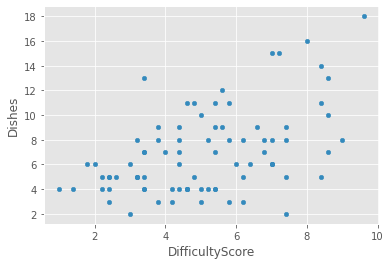

In [148]:
technical_challenge_recipes.plot(kind='scatter', x='DifficultyScore', y='Dishes');

Based on the scatter plot, it seems like linear regression would be an appropriate tool. Let's proceed!

**Question 8.1.** Complete the function `standard_units` which takes in an array or Series and returns an array with the values in standard units. Then use your function to standardize the `'DifficultyScore'` and `'Dishes'` columns from `technical_challenge_recipes`. Store the standardized arrays in the variables `difficulty_standard` and `dishes_standard`. 

*Note*: Since the inputs to the `standard_units` function might be arrays or Series with some missing values, use [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html) to compute means and standard deviations. These will ignore the missing values in the computation of the mean and standard deviation.


In [149]:
def standard_units(sequence):
    '''Returns the input sequence as an array in standard units.'''
    # Convert the input to an array, if it is not already.
    sequence = np.array(sequence)
    return (sequence - sequence.mean())/np.std(sequence)

difficulty_standard = standard_units(technical_challenge_recipes.get('DifficultyScore'))
dishes_standard = standard_units(technical_challenge_recipes.get('Dishes'))

In [150]:
grader.check("q8_1")

q8_1 results: All test cases passed!

**Question 8.2.** Complete the function `correlation`, which should take in:
1. `df`, a DataFrame,
2. `independent`, the column label of the independent ($x$) variable, as a string, and 
3. `dependent`, the column label of the dependent ($y$) variable, as a string.

The function should output the correlation between the two variables. As before, your function needs to work even if there are missing values in the DataFrame.

Then, use your function to compute the correlation between `'DifficultyScore'` and `'Dishes'` and store your result in the variable `corr`.

In [151]:
def correlation(df, independent, dependent):
    '''Returns the correlation between the independent and dependent variables in the given DataFrame.'''
    return (standard_units(df.get(independent)) * standard_units(df.get(dependent))).mean()

corr = correlation(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
corr

0.4945693747864214

In [152]:
grader.check("q8_2")

q8_2 results: All test cases passed!

**Question 8.3.** Now construct two functions, `reg_slope` and `reg_intercept`, which each take in the same three inputs as `correlation`. `reg_slope` should return the slope of the regression line and `reg_intercept` should return the intercept of the regression line, in original units. As before, your function needs to work even if there are missing values in the DataFrame.

Use your function to store the slope and intercept of the regression line for  `'DifficultyScore'` and `'Dishes'` in the variables `slope` and `intercept`.

In [153]:
def reg_slope(df, independent, dependent):
    '''Returns the slope of the regression line in original units.'''
    r = correlation(df, independent, dependent)
    return r * np.std(df.get(dependent)) / np.std(df.get(independent))

def reg_intercept(df, independent, dependent):
    '''Return the intercept of the regression line in original units.'''
    return df.get(dependent).mean() - reg_slope(df, independent, dependent) * df.get(independent).mean()

slope = reg_slope(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
intercept = reg_intercept(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
slope, intercept

(0.8421920391715867, 2.6336742104769924)

In [154]:
grader.check("q8_3")

q8_3 results: All test cases passed!

**Question 8.4.** Create a function called `predict` that takes in the same three inputs as `correlation`. `predict` should return an array of predicted values of the dependent variable calculated from the regression line. 

Use your function to create an array of the predicted number of dirty dishes for each recipe in the `technical_challenge_recipes` DataFrame, based on the recipe's difficulty. Save your answer as `predicted_dishes`. Note that the predicted number of dirty dishes need not be a whole number.


In [155]:
def predict(df, independent, dependent):
    '''Returns an array of predicted values of the dependent variable calculated from the regression line.'''
    return reg_slope(df, independent, dependent) * df.get(independent) + reg_intercept(df, independent, dependent)

predicted_dishes = predict(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
predicted_dishes

array([ 5.32868874,  4.14961988,  7.34994963,  7.01307281,  5.49712714,
        7.18151122,  6.33931918,  3.47586625,  4.6549351 ,  7.68682645,
        4.82337351,  6.17088077,  6.33931918,  7.01307281,  4.6549351 ,
        4.6549351 ,  5.16025033,  7.18151122,  5.16025033,  5.83400396,
        6.84463441,  8.52901848,  8.02370326,  6.84463441,  3.81274307,
        6.33931918,  5.32868874,  6.33931918,  6.50775759,  6.84463441,
        7.85526485,  9.87652575,  7.18151122,  4.4864967 ,  5.49712714,
        4.31805829,  6.676196  ,  6.50775759,  9.70808734,  6.00244237,
        8.36058008,  7.85526485,  8.52901848,  8.8658953 ,  6.50775759,
        4.6549351 ,  8.36058008,  7.18151122,  8.52901848,  8.8658953 ,
        8.8658953 ,  5.49712714,  8.8658953 ,  5.49712714,  5.49712714,
        7.51838804,  5.49712714,  6.17088077,  6.676196  ,  9.70808734,
        4.4864967 ,  8.52901848,  5.32868874,  8.19214167,  6.33931918,
        6.50775759,  7.34994963,  5.32868874,  7.18151122,  5.83

In [156]:
grader.check("q8_4")

q8_4 results: All test cases passed!

**Question 8.5.** Use the strategy for overlaying scatter plots described in [this tutorial](https://www.statology.org/pandas-scatter-plot-multiple-columns/) to create an overlaid scatter plot with:
- a blue dot 🔵 for each recipe showing the difficulty on the $x$-axis and the number of dirty dishes on the $y$-axis (as in the scatter plot at the beginning of this section), and
- a red dot 🔴 for each recipe showing the difficulty on the $x$-axis and the **predicted** number of dirty dishes on the $y$-axis.

The red dots should form a straight line - that's the regression line!

*Note:* This is the first time you've been asked to make an overlaid scatter plot, so you'll need to learn something new to answer this question. Read the linked tutorial carefully and try to mimic their example; you can learn how to do a lot of things this way!

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q8_5
points: 1
manual: True
-->

Text(0, 0.5, 'Dishes')

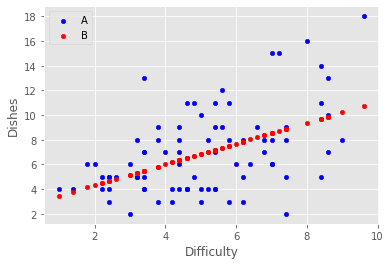

In [157]:
# Create your overlaid scatter plot here.
ax1 = technical_challenge_recipes.plot(kind='scatter', x='DifficultyScore', y='Dishes', color='blue', label='A')
ax2 = technical_challenge_recipes.assign(pre = predicted_dishes).plot(kind='scatter', x='DifficultyScore', y='pre', color='red', label='B', ax=ax1)
ax1.set_xlabel('Difficulty')
ax1.set_ylabel('Dishes')

<!-- END QUESTION -->



**Question 8.6.** Use the equation of the regression line to answer the following questions. Check that your answers are reasonable using the scatter plot above. Note that the predicted number of dirty dishes need not be a whole number.

1.  A recipe for crème caramel 🍮 has a difficulty score of 7.5. What is the predicted number of dirty dishes for this recipe? Save your answer as `creme_caramel`.
2. A basic recipe for chocolate chip cookies 🍪 has a difficulty score of $d$ and an advanced recipe for gourmet chocolate chip cookies 🍪 has a difficulty score of $d+2$. How many additional dirty dishes would we predict the advanced recipe to create, as compared to the basic one? Save your answer as `cookies`.
3. A recipe for pretzels 🥨 is predicted to create 6 dirty dishes. What is the difficulty of this recipe? Round to the nearest whole number and save your answer as `pretzels`.

In [158]:
creme_caramel = slope*7.5+intercept
cookies = 2*slope
pretzels = round((6-intercept)/slope)
print("creme caramel: "+str(creme_caramel))
print("cookies: "+str(cookies))
print("pretzels: "+str(pretzels))

creme caramel: 8.950114504263894
cookies: 1.6843840783431734
pretzels: 4


In [159]:
grader.check("q8_6")

q8_6 results: All test cases passed!

**Question 8.7.** Now that we have general code to calculate the regression line between any pair of variables in any DataFrame, let's generalize our code for the overlaid scatter plot so we can visualize relationships between other pairs of variables.

Complete the function `display_predictions` below. This function should take in the same three inputs as the `correlation` function, create an overlaid scatter plot similar to the one in Question 8.5, and return a string describing the correlation between the variables and the slope and intercept of the regression line.

'The correlation between DifficultyScore and Dishes is 0.49.  The slope of the regression line is 0.84. The intercept of the regression line is 2.63.'

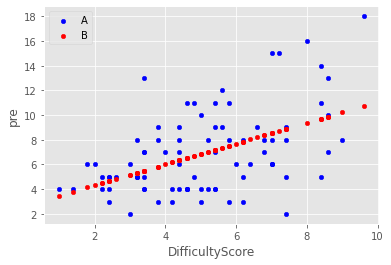

In [160]:
def display_predictions(df, independent, dependent):
    '''Generates an overlaid scatter plot showing the relationship between the independent and dependent variables in df.
    Returns a string describing the correlation and the slope and intercept of the regression line.'''
    # Create your overlaid scatter plot here.
    ax1 = df.plot(kind='scatter', x=independent, y=dependent, color='blue', label='A')
    ax2 = df.assign(pre = predict(df, independent, dependent)).plot(kind='scatter', x=independent, y='pre', color='red', label='B', ax=ax1)

    # We've provided the code for the return statement.
    return ("The correlation between {0} and {1} is {2}. " +\
           " The slope of the regression line is {3}." + \
           " The intercept of the regression line is {4}.")\
                .format(independent, 
                        dependent, 
                        str(round(correlation(df, independent, dependent), 2)),
                        str(round(reg_slope(df, independent, dependent), 2)), 
                        str(round(reg_intercept(df, independent, dependent), 2)))

# Your function should produce the same scatter plot as in Question 8.5 on the inputs below. 
# Make sure to test it out on other inputs too.
display_predictions(technical_challenge_recipes, 'DifficultyScore', 'Dishes')

**Question 8.8.** Using the `display_predictions` function you just wrote, create scatter plots and calculate regression lines that would help you answer each of the following questions. 

1. Do longer recipes with more sentences require more ingredients?
    - Store the output of your call to `display_predictions` in the variable `sentences_ingredients`.
2. Are recipes with more ingredients more difficult? 
    - Store the output of your call to `display_predictions` in the variable `ingredients_diff`.

In [161]:
technical_challenge_recipes

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
1,1,2,Scone,Paul,https://thegreatbritishbakeoff.co.uk/scones/,1,5,15,6,1.8
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
4,1,5,Cornish pasties,Paul,https://www.bbc.com/food/recipes/classic_corni...,2,11,32,4,3.4
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


'The correlation between RecipeSentences and IngredCount is 0.57.  The slope of the regression line is 0.19. The intercept of the regression line is 5.28.'

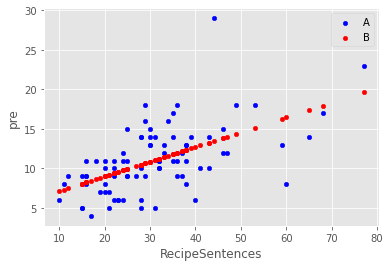

In [162]:
sentences_ingredients = display_predictions(technical_challenge_recipes, 'RecipeSentences', 'IngredCount')
sentences_ingredients

In [163]:
grader.check("q8_8_a")

q8_8_a results: All test cases passed!

'The correlation between IngredCount and DifficultyScore is 0.76.  The slope of the regression line is 0.36. The intercept of the regression line is 1.15.'

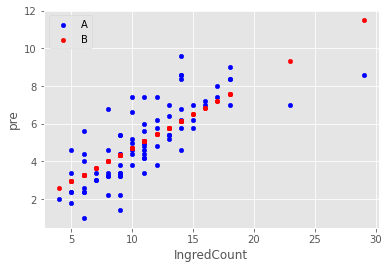

In [164]:
ingredients_diff = display_predictions(technical_challenge_recipes, 'IngredCount', 'DifficultyScore')
ingredients_diff

In [165]:
grader.check("q8_8_b")

q8_8_b results: All test cases passed!

<a id='sources'></a>
## Data Sources 📖

- Hill A, Ismay C, Iannone R (2022). bakeoff: Data from "The Great British Bake Off". https://bakeoff.netlify.app/, https://github.com/apreshill/bakeoff.

- Davis, Erin (2019). Are Great British Bake Off Technical Challenges getting harder? https://erdavis.com/2019/06/08/are-great-british-bake-off-technical-challenges-getting-harder/, https://gist.github.com/erdavis1/09fd4a3aa424c5425a88d47f572ec20a.

- Ahamed, Nick (2019). Analyzing the Great British Bake Off. https://medium.com/analytics-vidhya/analyzing-the-great-british-bake-off-part-1-ffcdf3791bf3, https://medium.com/@nickahamed/analyzing-the-great-british-bake-off-part-2-1695ff95a0c9, https://docs.google.com/spreadsheets/d/1cvouOik_01QqtFQSq78xODIjcZZ8A-02VXa6IBvdG3I/edit#gid=0.